<a href="https://colab.research.google.com/github/habibashar786/Agentic-Ai-Project/blob/main/CVD_RISK_MLOPS_WITH_A_I_(Final_Version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
# !pip install xgboost
# !pip install graphviz
# !pip install shap numpy pandas scikit-learn
# !pip install catboost
!pip install lime
# !pip install plotly
# !pip install tensorflow
# !pip install nbconvert[webpdf]
# !pip install pandas scikit-learn tensorflow
# !pip install torchviz
# !pip install graphviz
# !pip install torch torchvision torchaudio
# !pip install jovian --upgrade --quiet
# # !pip install -U kaleido
# !pip install fastapi python-multipart uvicorn
# !pip install typing-extensions==4.5.0
# !pip install --upgrade tensorflow-probability



In [234]:
!apt-get update
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf "/content/drive/My Drive/CVD Data Set.csv"


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, roc_auc_score
import xgboost as xgb
from scipy import stats
from sklearn.decomposition import PCA
import shap
shap.initjs()
# import jovian


In [236]:
# jovian.commit(project='cvd_risk_mlops_ai')

In [237]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
!ls "/content/drive/My Drive/"


 Ashar_Final_Thesis_Video_PPT_LJMU   fmed-10-1150933.pdf
 chest_xray			    'interim report cvd risk.pdf'
'Colab Notebooks'		    'Survey and General Paper 25_Sep_23'
'CVD Data Set.csv'		     Untitled0.ipynb
 CVIA.2023.0011.pdf		     Untitled1.ipynb
'Final Thesis LJMU Video'	    'Untitled Diagram.drawio'


In [239]:
# Replace 'folder/file.txt' with the actual path to your file within Google Drive
file_path = '/content/drive/My Drive/CVD Data Set.csv'

# Now, you can open and read the file as you would do with a local file
with open(file_path, 'r') as file:
    content = file.read()
    # print(content)
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset file in Google Drive
df = pd.read_csv('/content/drive/My Drive/CVD Data Set.csv')



In [240]:
df.head()

,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
0,7.709001e+09,65,Female,primary,married,self-employed,140.5,78.5,156.0,18.90204,nonsmoker,sepanjang,rural,<10%,No,No,No,No
1,7.709001e+09,60,Male,primary,married,self-employed,156.0,108.5,113.0,25.47666,smoker,sepanjang,rural,clinicall high risk,Yes,No,No,No
2,8.005070e+09,87,Male,primary,married,not working,153.5,77.0,91.0,NaN,pastsmoker,majangtengah,rural,20-30%,Yes,No,No,No
3,8.005070e+09,82,Female,primary,married,not working,152.0,76.0,114.0,23.89138,nonsmoker,majangtengah,rural,20-30%,Yes,No,No,No
4,8.005070e+09,55,Female,primary,widowed,casual worker,179.0,94.0,130.0,29.48870,nonsmoker,majangtengah,rural,clinicall high risk,Yes,No,No,No


In [241]:
df.shape

(22093, 18)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22093 entries, 0 to 22092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      22093 non-null  float64
 1   age             22093 non-null  int64  
 2   sex             22093 non-null  object 
 3   education       22080 non-null  object 
 4   marital_status  22030 non-null  object 
 5   occupation      22086 non-null  object 
 6   sbp_avg         22010 non-null  float64
 7   dbp_avg         22012 non-null  float64
 8   bg_mgdl         21986 non-null  float64
 9   bmi             21885 non-null  float64
 10  smoking         22093 non-null  object 
 11  village         22093 non-null  object 
 12  areas           22093 non-null  object 
 13  cvdrisk         22091 non-null  object 
 14  highrisk        22093 non-null  object 
 15  bplt            22093 non-null  object 
 16  lltt            22093 non-null  object 
 17  aptt            22093 non-null 

In [243]:
df.describe()

,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi
count,2.209300e+04,22093.000000,22010.000000,22012.000000,21986.000000,21885.000000
mean,5.993599e+11,54.916535,140.390277,88.422679,126.029200,24.984793
std,1.758180e+12,10.787480,23.770916,13.049924,60.497661,4.714012
min,7.709001e+09,40.000000,75.500000,47.000000,40.000000,14.034470
25%,1.020200e+11,46.000000,123.000000,79.500000,94.000000,21.718070
50%,1.030300e+11,53.000000,136.000000,87.000000,110.000000,24.557750
75%,1.040400e+11,61.000000,154.000000,95.500000,133.000000,27.681660
max,9.711270e+12,116.000000,243.000000,190.000000,663.000000,53.624260


In [244]:
df.isnull().sum()

,0
patient_id,0
age,0
sex,0
education,13
marital_status,63
occupation,7
sbp_avg,83
dbp_avg,81
bg_mgdl,107
bmi,208


In [245]:
df1 = pd.DataFrame(df)

In [246]:
df1.isnull().sum()

,0
patient_id,0
age,0
sex,0
education,13
marital_status,63
occupation,7
sbp_avg,83
dbp_avg,81
bg_mgdl,107
bmi,208


In [247]:
df_2 = df1.dropna()
df_2.head()

,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
0,7.709001e+09,65,Female,primary,married,self-employed,140.5,78.5,156.0,18.90204,nonsmoker,sepanjang,rural,<10%,No,No,No,No
1,7.709001e+09,60,Male,primary,married,self-employed,156.0,108.5,113.0,25.47666,smoker,sepanjang,rural,clinicall high risk,Yes,No,No,No
3,8.005070e+09,82,Female,primary,married,not working,152.0,76.0,114.0,23.89138,nonsmoker,majangtengah,rural,20-30%,Yes,No,No,No
4,8.005070e+09,55,Female,primary,widowed,casual worker,179.0,94.0,130.0,29.48870,nonsmoker,majangtengah,rural,clinicall high risk,Yes,No,No,No
5,1.011600e+10,100,Male,primary,widowed,not working,191.0,101.0,168.0,20.26936,pastsmoker,sepanjang,rural,clinicall high risk,Yes,No,No,No


In [248]:
df_2.isnull().sum()

,0
patient_id,0
age,0
sex,0
education,0
marital_status,0
occupation,0
sbp_avg,0
dbp_avg,0
bg_mgdl,0
bmi,0


In [249]:
b=df_2.shape
b

(21623, 18)

In [250]:
a= df1.shape
a

(22093, 18)

In [251]:
c=a[0]-b[0]
c

470

In [252]:
df_2.duplicated().sum()

1

In [253]:
duplicates = df_2[df_2.duplicated()]
duplicates

,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
16267,1.040400e+11,60,Female,primary,married,not working,135.5,77.5,251.0,25.56611,nonsmoker,kendalpayak,urban,<10%,No,No,No,No


In [254]:
df_no_duplicates = df_2.drop_duplicates()
df_no_duplicates

,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
0,7.709001e+09,65,Female,primary,married,self-employed,140.5,78.5,156.0,18.90204,nonsmoker,sepanjang,rural,<10%,No,No,No,No
1,7.709001e+09,60,Male,primary,married,self-employed,156.0,108.5,113.0,25.47666,smoker,sepanjang,rural,clinicall high risk,Yes,No,No,No
3,8.005070e+09,82,Female,primary,married,not working,152.0,76.0,114.0,23.89138,nonsmoker,majangtengah,rural,20-30%,Yes,No,No,No
4,8.005070e+09,55,Female,primary,widowed,casual worker,179.0,94.0,130.0,29.48870,nonsmoker,majangtengah,rural,clinicall high risk,Yes,No,No,No
5,1.011600e+10,100,Male,primary,widowed,not working,191.0,101.0,168.0,20.26936,pastsmoker,sepanjang,rural,clinicall high risk,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22088,9.710780e+12,40,Female,secondary,married,not working,117.5,80.0,322.0,40.68560,nonsmoker,kendalpayak,urban,<10%,No,No,No,No
22089,9.711250e+12,65,Female,primary,widowed,not working,141.0,97.0,111.0,26.66667,nonsmoker,kendalpayak,urban,<10%,No,No,No,No
22090,9.711260e+12,56,Female,primary,married,not working,123.5,81.0,87.0,24.55775,nonsmoker,kendalpayak,urban,<10%,No,No,No,No
22091,9.711270e+12,43,Female,primary,married,self-employed,124.5,95.5,86.0,26.83518,nonsmoker,kendalpayak,urban,<10%,No,No,No,No


In [255]:
df3 = df_no_duplicates.copy()
df3.isnull().sum()

,0
patient_id,0
age,0
sex,0
education,0
marital_status,0
occupation,0
sbp_avg,0
dbp_avg,0
bg_mgdl,0
bmi,0


In [256]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21622 entries, 0 to 22092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      21622 non-null  float64
 1   age             21622 non-null  int64  
 2   sex             21622 non-null  object 
 3   education       21622 non-null  object 
 4   marital_status  21622 non-null  object 
 5   occupation      21622 non-null  object 
 6   sbp_avg         21622 non-null  float64
 7   dbp_avg         21622 non-null  float64
 8   bg_mgdl         21622 non-null  float64
 9   bmi             21622 non-null  float64
 10  smoking         21622 non-null  object 
 11  village         21622 non-null  object 
 12  areas           21622 non-null  object 
 13  cvdrisk         21622 non-null  object 
 14  highrisk        21622 non-null  object 
 15  bplt            21622 non-null  object 
 16  lltt            21622 non-null  object 
 17  aptt            21622 non-null  obje

In [257]:
df3['sex'] = df3['sex'].astype('category');
df3['highrisk'] = df3['highrisk'].astype('category');
df3['bplt'] = df3['bplt'].astype('category');
df3['lltt'] = df3['lltt'].astype('category');
df3['aptt'] = df3['aptt'].astype('category');

In [258]:
categorical_Data = df3['sex'].cat.codes
categorical_Data = df3['highrisk'].cat.codes
categorical_Data = df3['bplt'].cat.codes
categorical_Data = df3['lltt'].cat.codes
categorical_Data = df3['aptt'].cat.codes

In [259]:
categorical_Data.head()

,0
0,0
1,0
3,0
4,0
5,0


In [260]:
df3.describe()

,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi
count,2.162200e+04,21622.000000,21622.000000,21622.000000,21622.000000,21622.000000
mean,6.012693e+11,54.784109,140.329086,88.441079,125.927528,24.971049
std,1.762154e+12,10.693276,23.702971,13.009072,60.432670,4.695728
min,7.709001e+09,40.000000,79.000000,47.000000,40.000000,14.034470
25%,1.020200e+11,46.000000,123.000000,79.500000,94.000000,21.718070
50%,1.030300e+11,53.000000,136.000000,87.000000,110.000000,24.557750
75%,1.040400e+11,61.000000,153.500000,95.500000,133.000000,27.678740
max,9.711270e+12,116.000000,243.000000,190.000000,663.000000,53.624260


In [261]:
numeric_df = df3.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,patient_id,age,sbp_avg,dbp_avg,bg_mgdl,bmi
patient_id,1.000000,0.002407,0.007305,0.009003,-0.001184,0.006653
age,0.002407,1.000000,0.293173,-0.026608,0.065730,-0.238923
sbp_avg,0.007305,0.293173,1.000000,0.765192,0.107343,0.143169
dbp_avg,0.009003,-0.026608,0.765192,1.000000,0.051179,0.268244
bg_mgdl,-0.001184,0.065730,0.107343,0.051179,1.000000,0.096581
bmi,0.006653,-0.238923,0.143169,0.268244,0.096581,1.000000


In [262]:
def map_cvd_risk(value):
    if "<10%" in value or "10-20%" in value:
        return "mild"
    elif "20-30%" in value or "30-40%" in value:
        return "medium"
    elif ">40%" in value or "clinicall high risk" in value or "past history of CVD" in value:
        return "high"
    else:
        return "unknown"

In [263]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21622 entries, 0 to 22092
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   patient_id      21622 non-null  float64 
 1   age             21622 non-null  int64   
 2   sex             21622 non-null  category
 3   education       21622 non-null  object  
 4   marital_status  21622 non-null  object  
 5   occupation      21622 non-null  object  
 6   sbp_avg         21622 non-null  float64 
 7   dbp_avg         21622 non-null  float64 
 8   bg_mgdl         21622 non-null  float64 
 9   bmi             21622 non-null  float64 
 10  smoking         21622 non-null  object  
 11  village         21622 non-null  object  
 12  areas           21622 non-null  object  
 13  cvdrisk         21622 non-null  object  
 14  highrisk        21622 non-null  category
 15  bplt            21622 non-null  category
 16  lltt            21622 non-null  category
 17  aptt            2

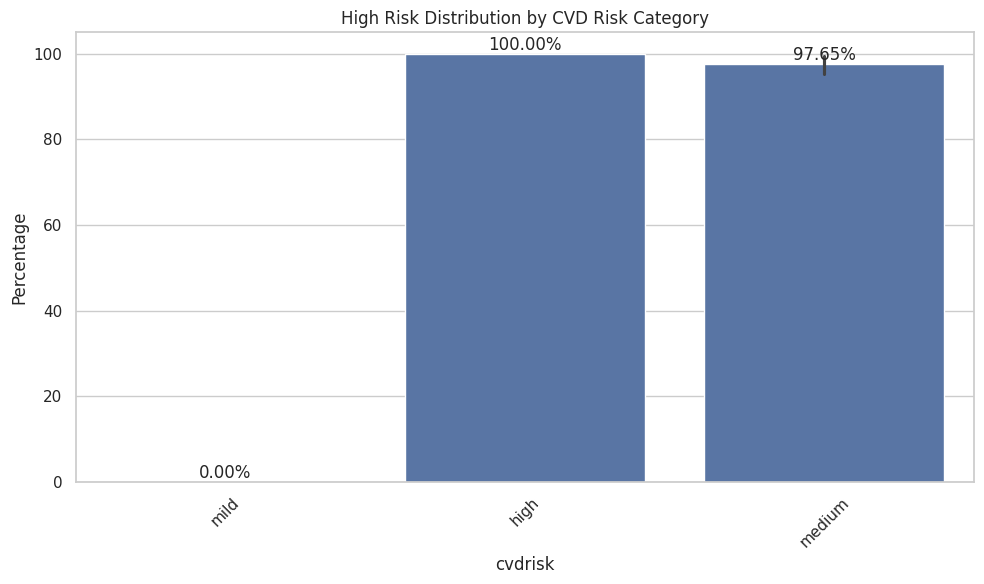

In [264]:
risk_df = df3[['cvdrisk', 'highrisk']]
risk_df['cvdrisk'] = df3["cvdrisk"].apply(map_cvd_risk)
risk_df['highrisk'] = df3['highrisk'].cat.codes
cvd_risk_percentages = risk_df.groupby('cvdrisk')['highrisk'].mean() * 100
# risk_df.head()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=risk_df, x='cvdrisk', y='highrisk', estimator=lambda x: sum(x) / len(x) * 100)
ax.set(ylabel='Percentage')
ax.set_title('High Risk Distribution by CVD Risk Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

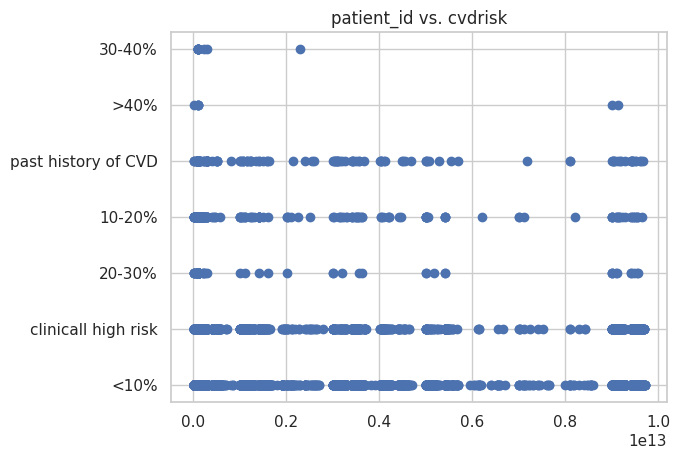

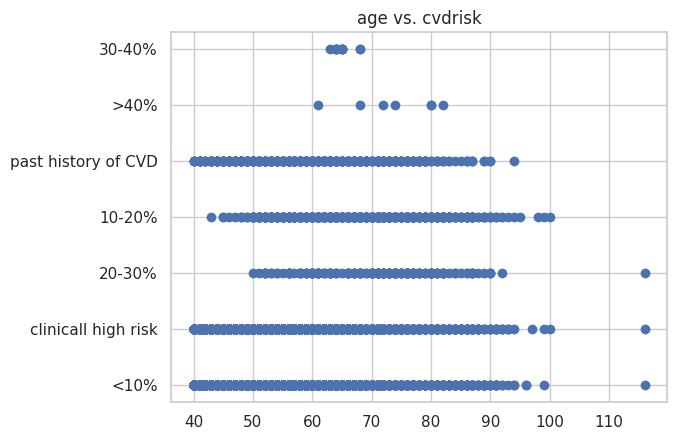

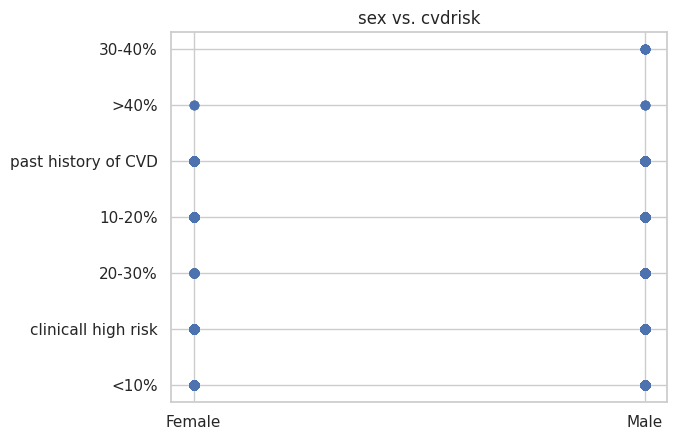

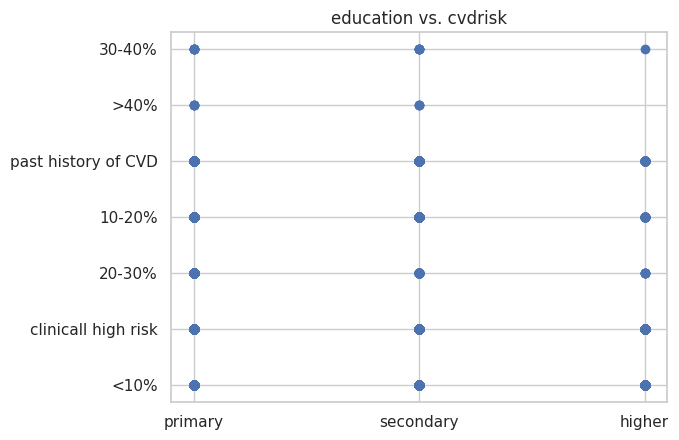

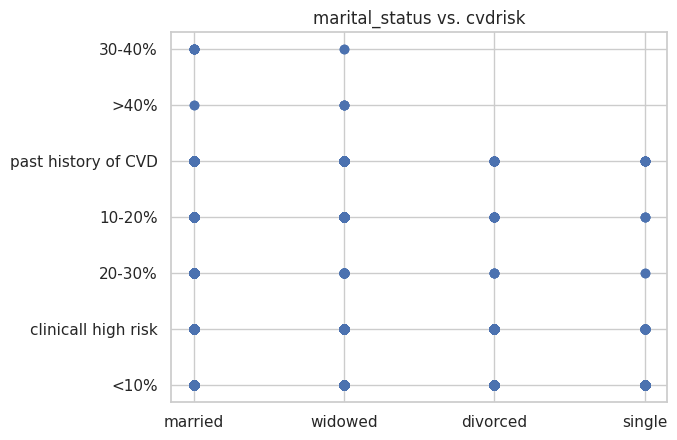

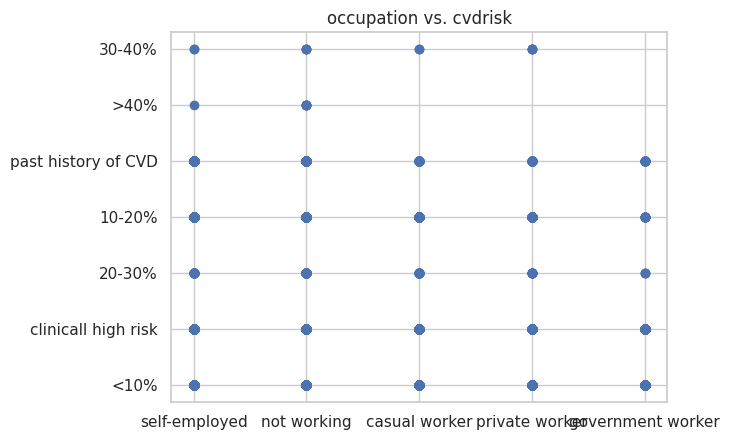

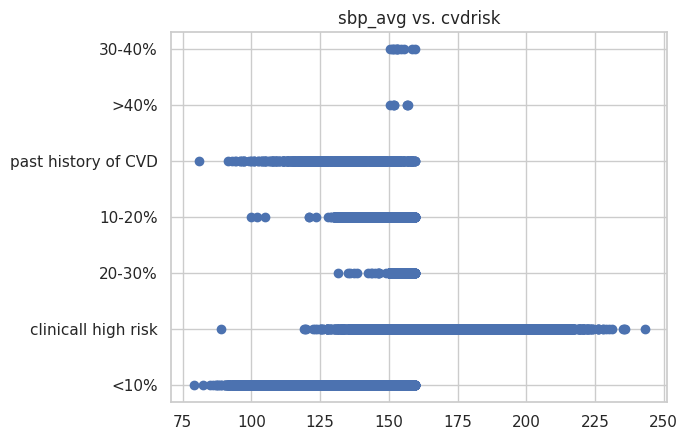

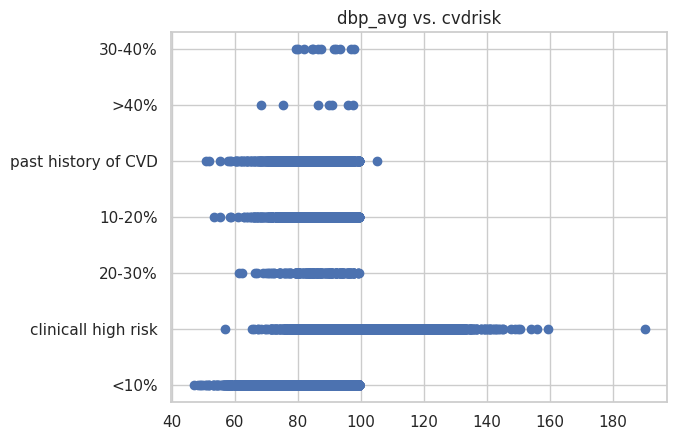

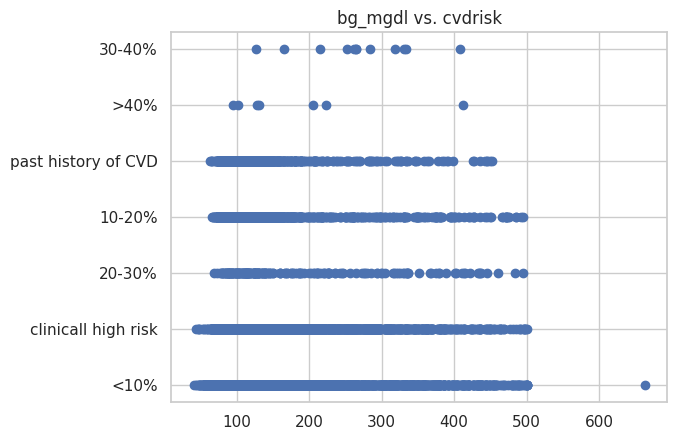

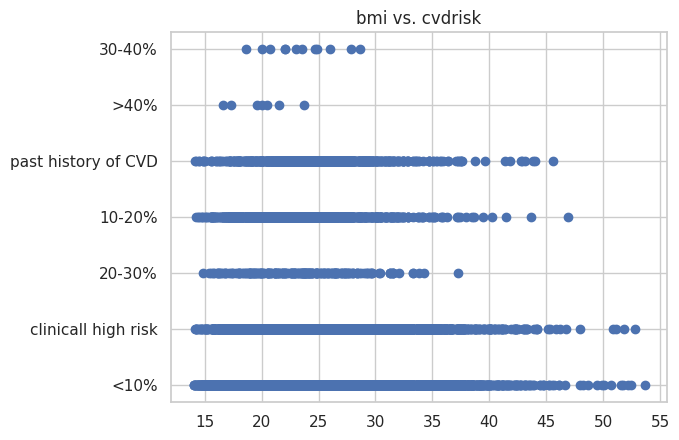

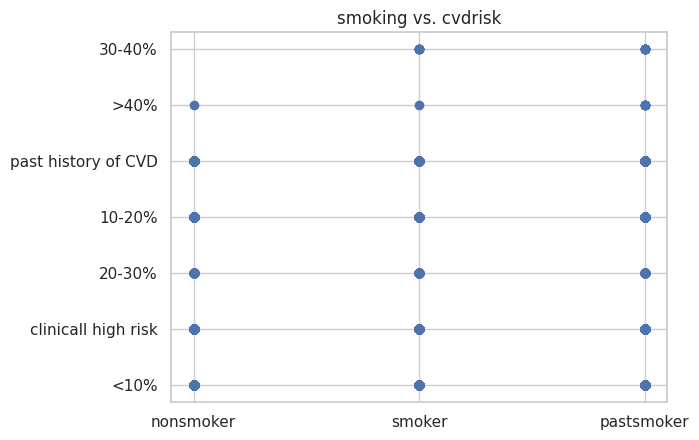

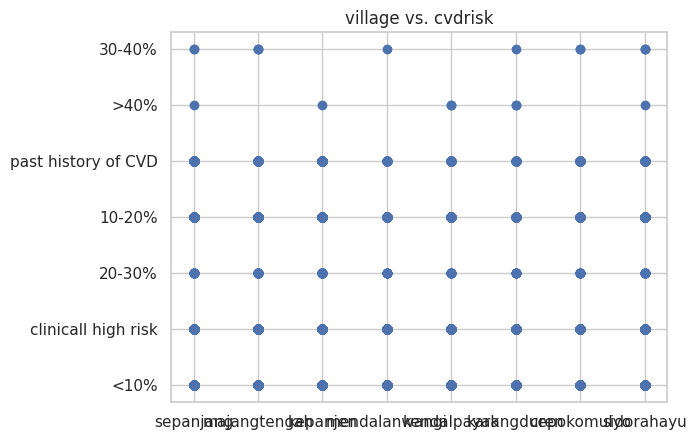

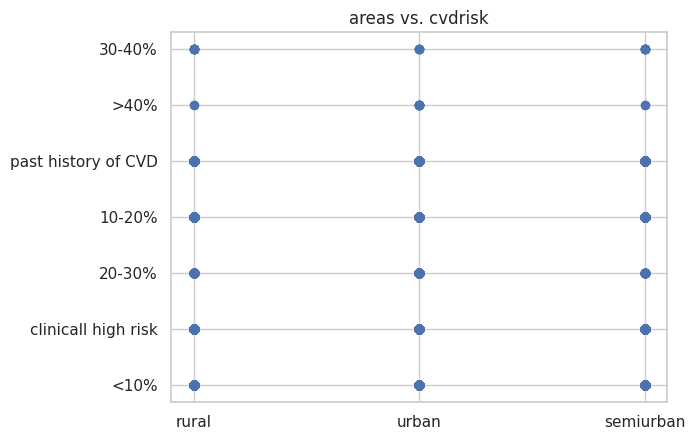

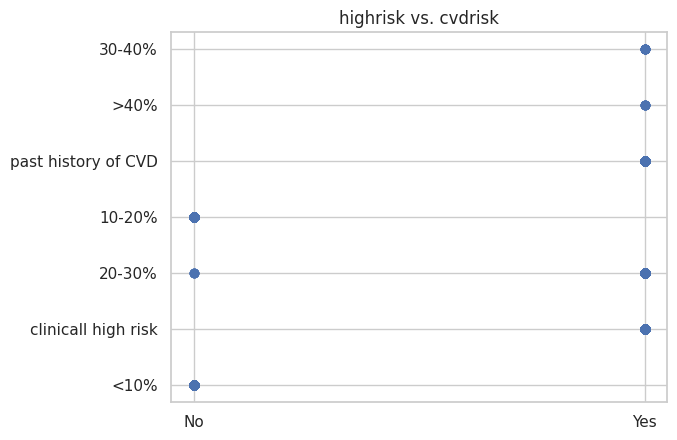

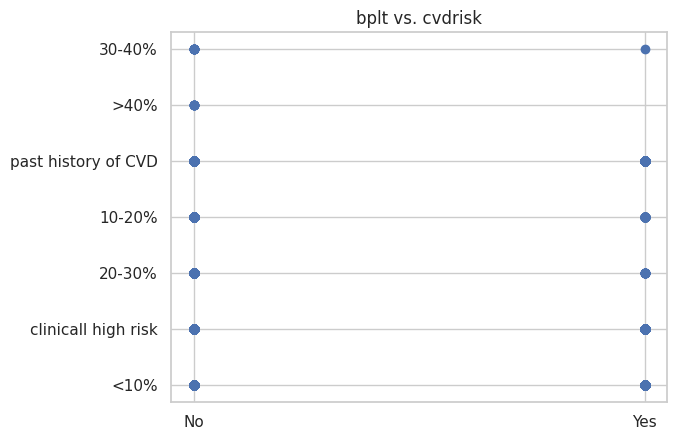

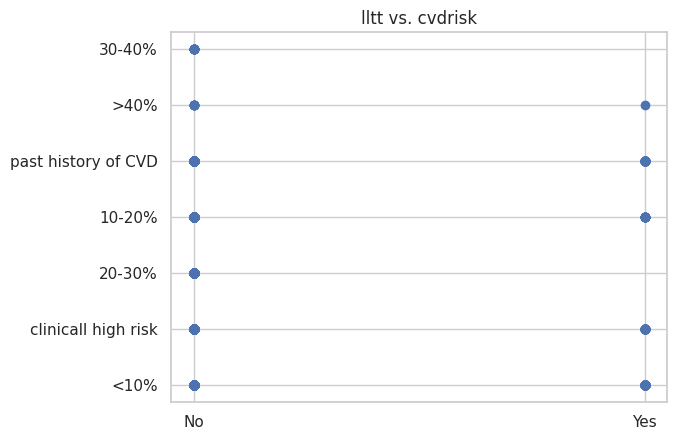

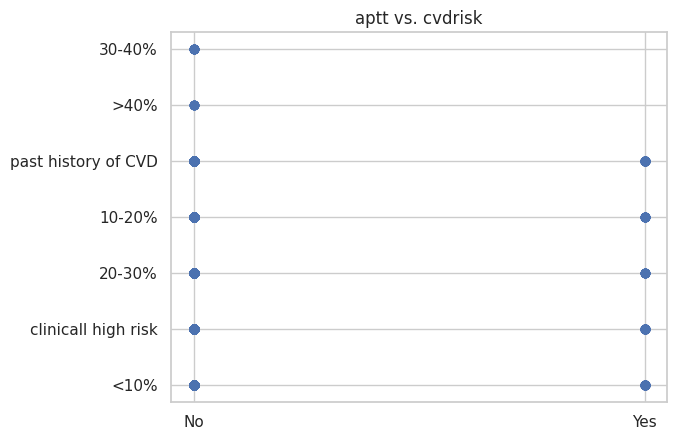

In [265]:
for i in df3.columns:
    if i != "cvdrisk":
        plt.scatter(df3[i], df3["cvdrisk"])
        plt.title(f"{i} vs. cvdrisk")
        plt.show()

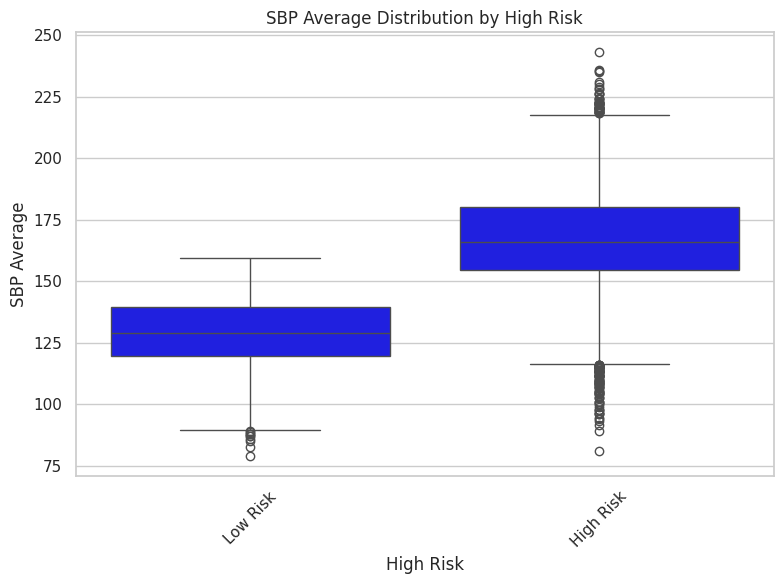

In [266]:
colors = ["blue", "orange"]
sns.set_palette(sns.color_palette(colors))

# Create a box plot to visualize sbp_avg distribution by highrisk
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df3, x='highrisk', y='sbp_avg')
ax.set_xticklabels(['Low Risk', 'High Risk'], rotation=45)
plt.title('SBP Average Distribution by High Risk')
plt.xlabel('High Risk')
plt.ylabel('SBP Average')
plt.tight_layout()
plt.show()

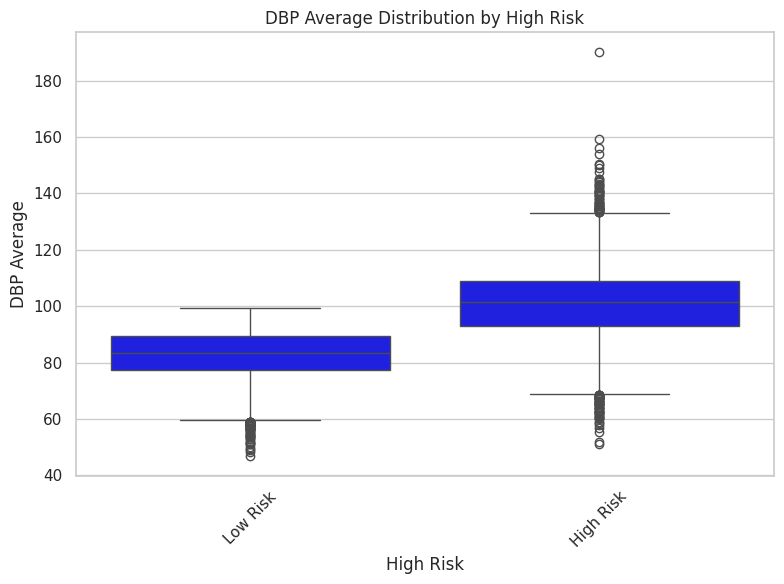

In [267]:
colors = ["blue", "green"]
sns.set_palette(sns.color_palette(colors))

# Create a box plot to visualize dbp_avg distribution by highrisk
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df3, x='highrisk', y='dbp_avg')
ax.set_xticklabels(['Low Risk', 'High Risk'], rotation=45)
plt.title('DBP Average Distribution by High Risk')
plt.xlabel('High Risk')
plt.ylabel('DBP Average')
plt.tight_layout()
plt.show()

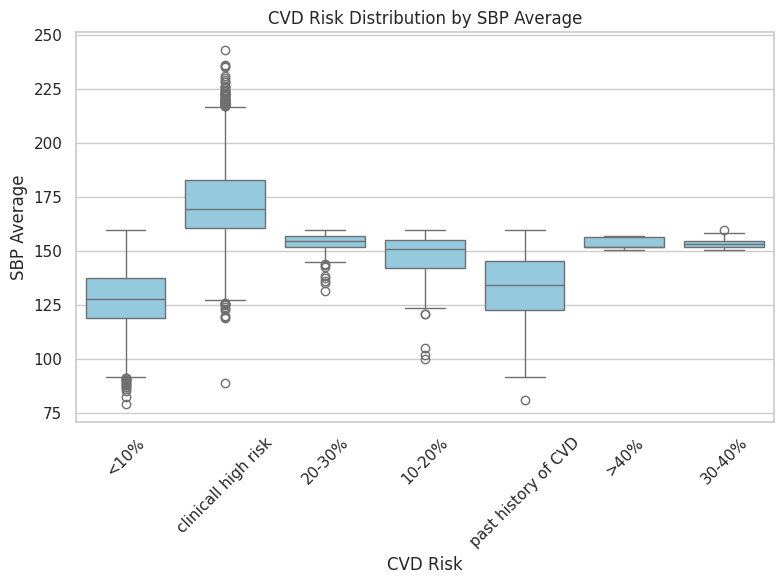

In [268]:
colors = ["skyblue", "orange"]
sns.set_palette(sns.color_palette(colors))

# Create a box plot to visualize cvdrisk distribution by sbp_avg
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df3, x='cvdrisk', y='sbp_avg')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('CVD Risk Distribution by SBP Average')
plt.xlabel('CVD Risk')
plt.ylabel('SBP Average')
plt.tight_layout()
plt.show()

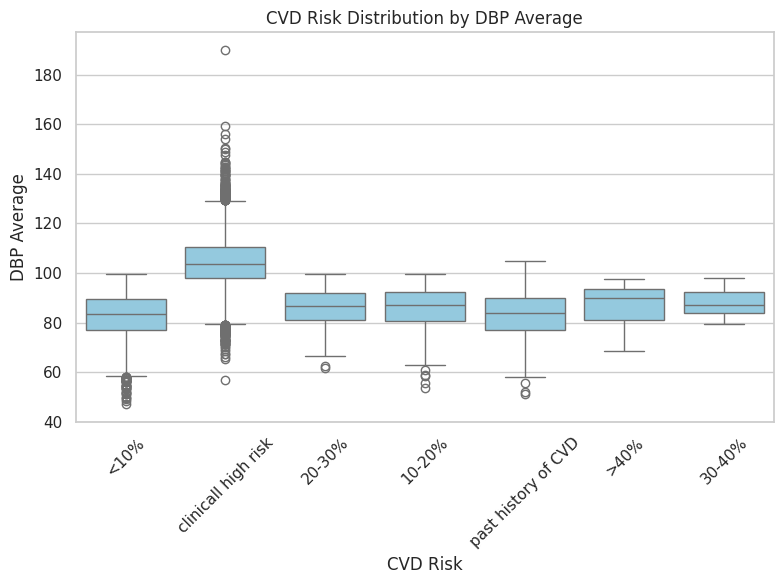

In [269]:
colors = ["skyblue", "orange"]
sns.set_palette(sns.color_palette(colors))

# Create a box plot to visualize cvdrisk distribution by sbp_avg
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df3, x='cvdrisk', y='dbp_avg')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('CVD Risk Distribution by DBP Average')
plt.xlabel('CVD Risk')
plt.ylabel('DBP Average')
plt.tight_layout()
plt.show()

In [270]:
df3.columns

Index(['patient_id', 'age', 'sex', 'education', 'marital_status', 'occupation',
       'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi', 'smoking', 'village', 'areas',
       'cvdrisk', 'highrisk', 'bplt', 'lltt', 'aptt'],
      dtype='object')

In [271]:
summary = pd.DataFrame(df3.describe(include='all'))
print(summary)

          patient_id           age     sex education marital_status  \
count   2.162200e+04  21622.000000   21622     21622          21622   
unique           NaN           NaN       2         3              4   
top              NaN           NaN  Female   primary        married   
freq             NaN           NaN   12205     13103          17719   
mean    6.012693e+11     54.784109     NaN       NaN            NaN   
std     1.762154e+12     10.693276     NaN       NaN            NaN   
min     7.709001e+09     40.000000     NaN       NaN            NaN   
25%     1.020200e+11     46.000000     NaN       NaN            NaN   
50%     1.030300e+11     53.000000     NaN       NaN            NaN   
75%     1.040400e+11     61.000000     NaN       NaN            NaN   
max     9.711270e+12    116.000000     NaN       NaN            NaN   

         occupation       sbp_avg       dbp_avg       bg_mgdl           bmi  \
count         21622  21622.000000  21622.000000  21622.000000  21622

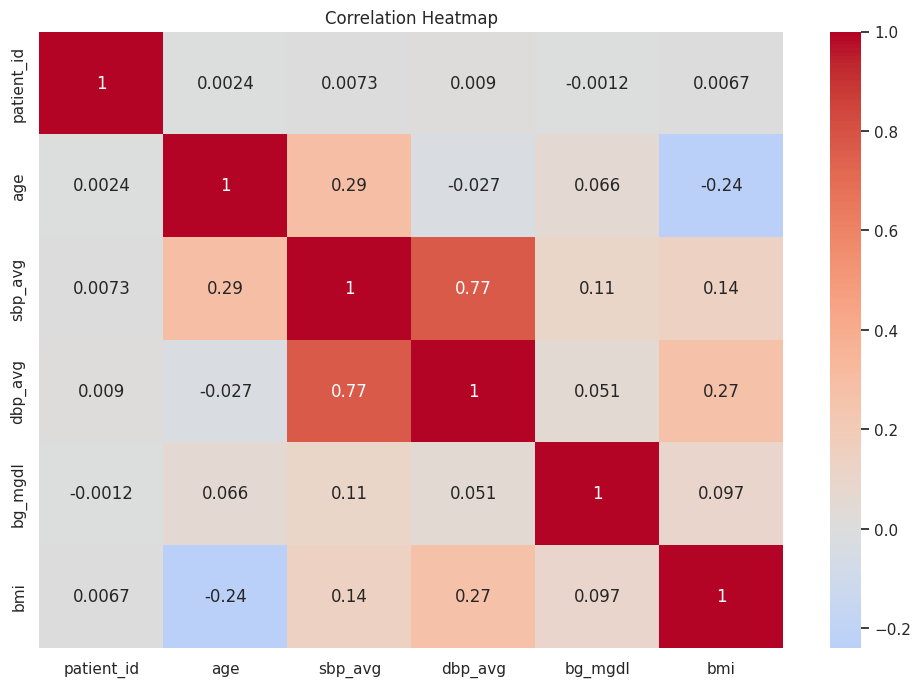

In [272]:
correlation_matrix = df3.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

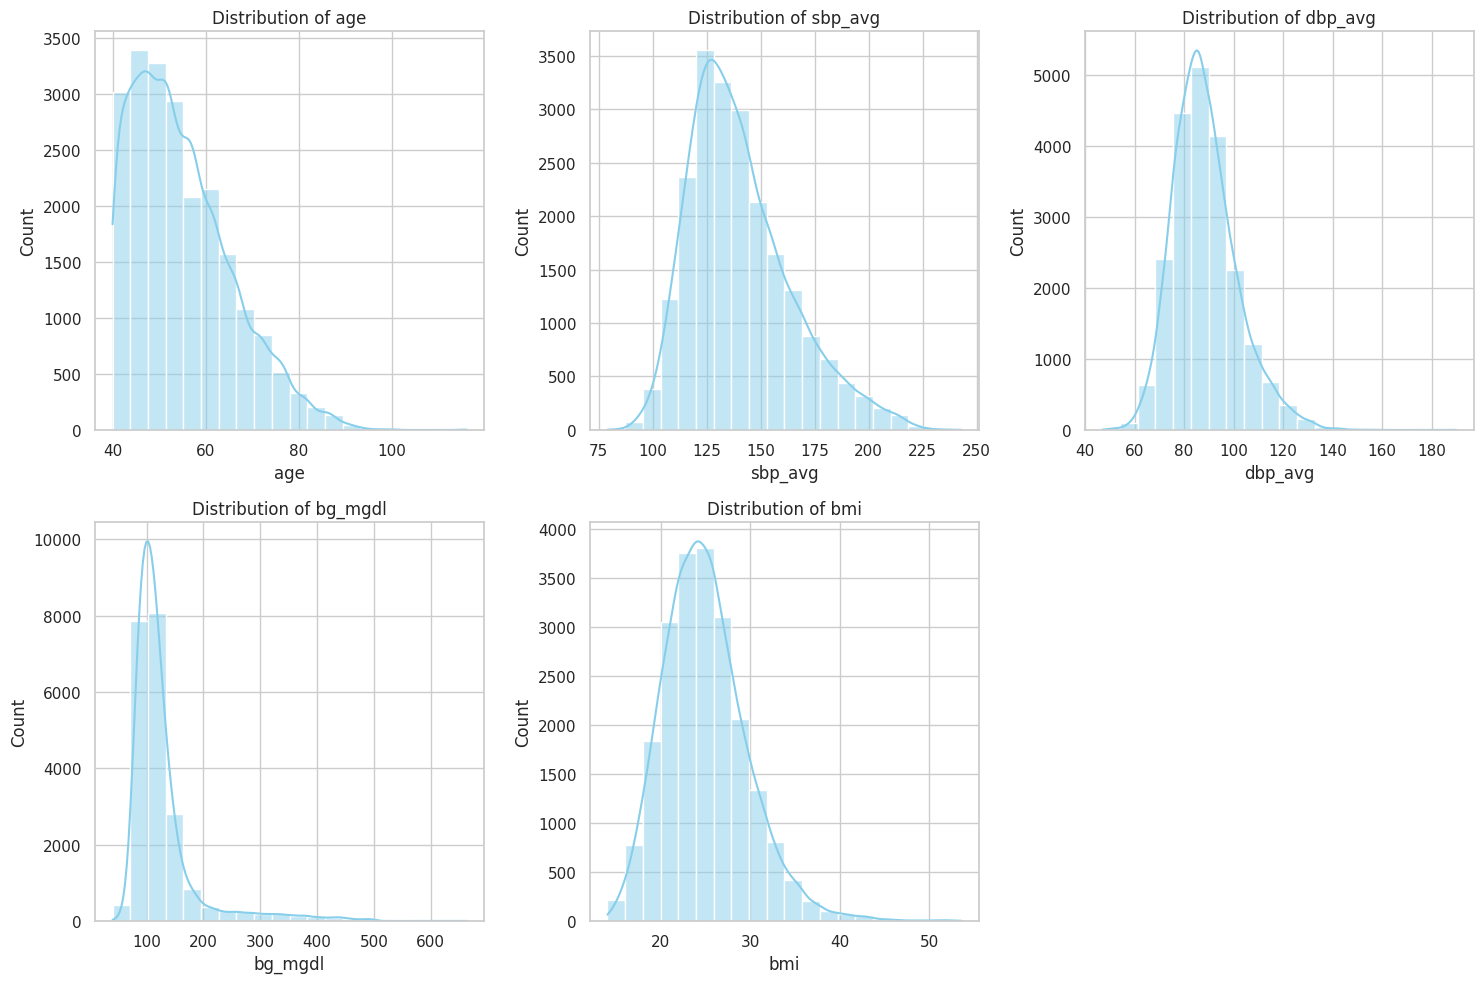

In [273]:
numeric_features = ['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df3, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


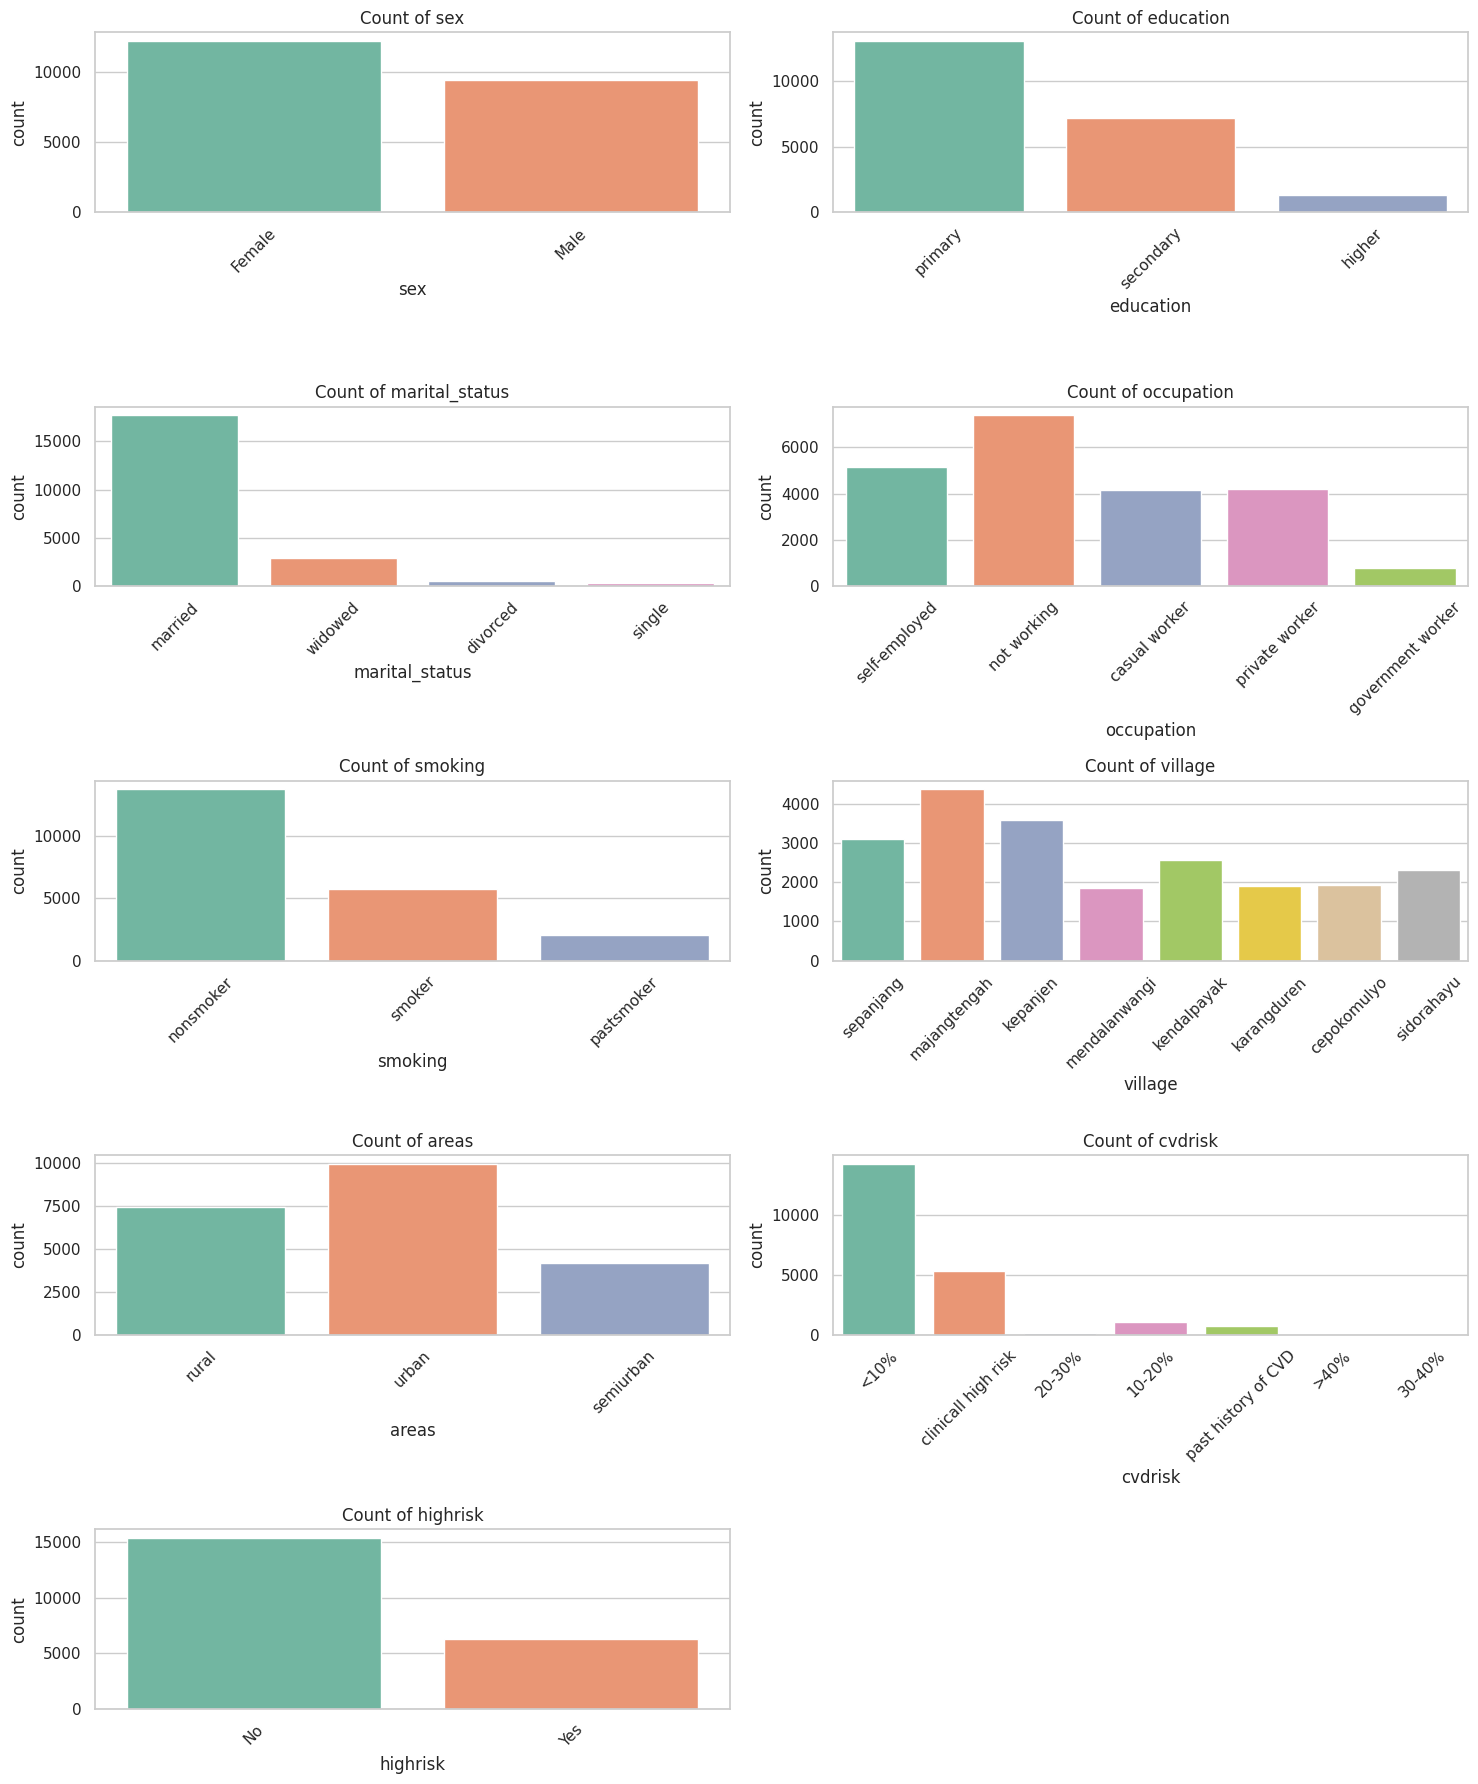

In [274]:
categorical_features = ['sex', 'education', 'marital_status', 'occupation', 'smoking', 'village', 'areas', 'cvdrisk', 'highrisk']
plt.figure(figsize=(15, 18))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df3, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [275]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, theme, element_text, labs, scale_fill_brewer
from plotnine.facets import facet_wrap

# Assuming df3 is your DataFrame
categorical_features = ['sex', 'education', 'marital_status', 'occupation', 'smoking', 'village', 'areas', 'cvdrisk', 'highrisk']

# Melt the dataframe for easier plotting with plotnine
df_long = pd.melt(df3, value_vars=categorical_features)

# Define the base plot
base_plot = (ggplot(df_long, aes(x='value', fill='value')) +
             geom_bar(color='black') +
             theme(axis_text_x=element_text(angle=45, hjust=1),
                   figure_size=(14, 9)) +  # Increase figure size
             facet_wrap('~variable', scales='free') +
             labs(x='', y='Count'))

# Apply a color palette for visual appeal
plot = base_plot + scale_fill_brewer(type='qual', palette='Set3')

# Display the plot
print(plot)


<ggplot: (1400 x 900)>


## **Analysis of Categorical Variables in CVD Risk Prediction**

**Introduction:**

Cardiovascular diseases (CVD) remain a leading cause of morbidity and mortality globally. Accurate prediction of CVD risk is critical for the timely intervention and management of at-risk populations. The utilization of categorical variables in risk prediction models can enhance the granularity of risk stratification and provide insights into diverse population subgroups. We present an analysis of such categorical variables from a dataset aimed at predicting the risk of CVD.


**Methods:**
The dataset comprises several categorical variables, including area of residence, CVD risk levels, educational background, employment status, marital status, gender, smoking habits, and village of origin. We analyze these variables using descriptive statistics to understand their distribution and potential associations with CVD risk.


**Results:**
Area of Residence: The population distribution across rural, semi-urban, and urban areas is skewed towards urban living, which may reflect an urbanization trend or a sample bias towards urban dwellers. Urban environments can be associated with both higher risk factors for CVD due to lifestyle and greater access to healthcare facilities for risk assessment.


**CVD Risk Levels:**

 The majority of individuals have a CVD risk level below 30%, with a significant proportion clinically identified as high risk or with a past history of CVD. This indicates a potentially high prevalence of CVD-related health issues within the sampled population.

**Educational Background:**

A higher number of individuals possess secondary education, followed by primary and higher education. This distribution could impact the population's health literacy and consequently their ability to engage with health-promoting behaviors.

**Employment Status:**

 Private workers form the largest employment category, with casual and government workers being less common. Employment status is often linked to socioeconomic status, which is a known determinant of health outcomes.

**Marital Status:**

 Married individuals represent the largest group, suggesting that the sample may include a mature age demographic, which is typically at a higher risk for CVD.

**Gender:**

 The gender distribution is fairly balanced, allowing for gender-based risk analysis.

**Smoking Habits: **

Non-smokers dominate the dataset, which is a favorable factor in CVD risk reduction. However, the presence of smokers and past smokers indicates a need for targeted interventions.

**Village of Origin:**

The dataset includes a diverse representation of villages, which may correlate with varying levels of access to healthcare and different prevalence of risk factors due to geographic and socioeconomic diversity.

**Discussion:**

The categorical variables suggest a complex interplay between socioeconomic factors, lifestyle choices, and health literacy in shaping CVD risk. Urbanization, educational attainment, and employment status emerge as critical determinants of health. There is a clear indication that targeted interventions could be beneficial, especially in urban areas where the risk factors might be prevalent but healthcare access is better. The balance in gender distribution is essential for assessing sex-specific risk factors and outcomes. Smoking cessation programs could be a vital component of CVD risk reduction strategies.

**Conclusion:**

Our analysis underscores the importance of incorporating categorical variables into CVD risk prediction models. They offer valuable insights that can inform public health policies and personalized patient care. Future models should aim to include such variables to refine risk predictions and enhance the effectiveness of CVD prevention strategies.

**Future Work:**

Further research should explore the causal relationships between these categorical variables and CVD outcomes using multivariate analyses and longitudinal studies to establish temporality and causation.

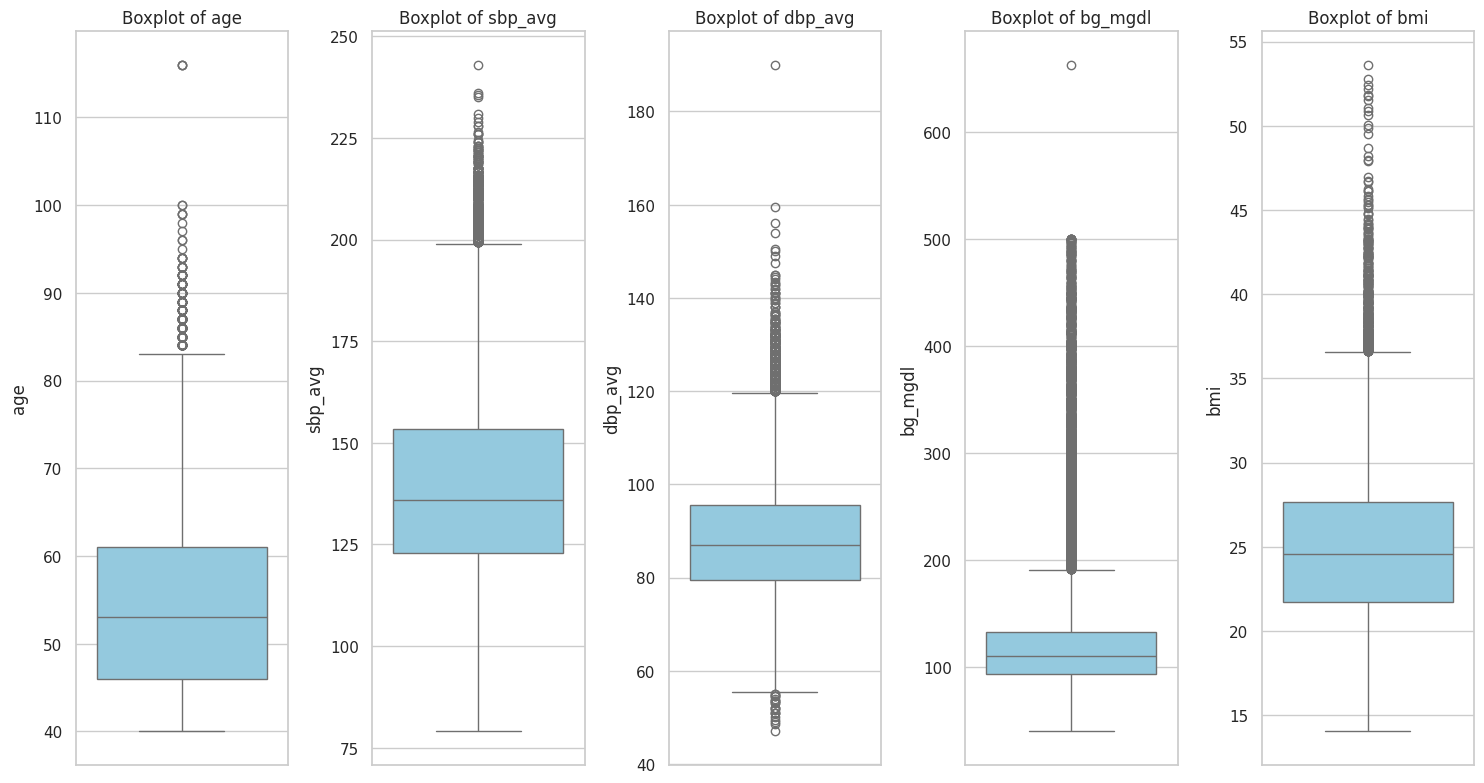

In [276]:
numeric_features = ['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']

# Create box plots for outlier detection
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, len(numeric_features), i)
    sns.boxplot(data=df3, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

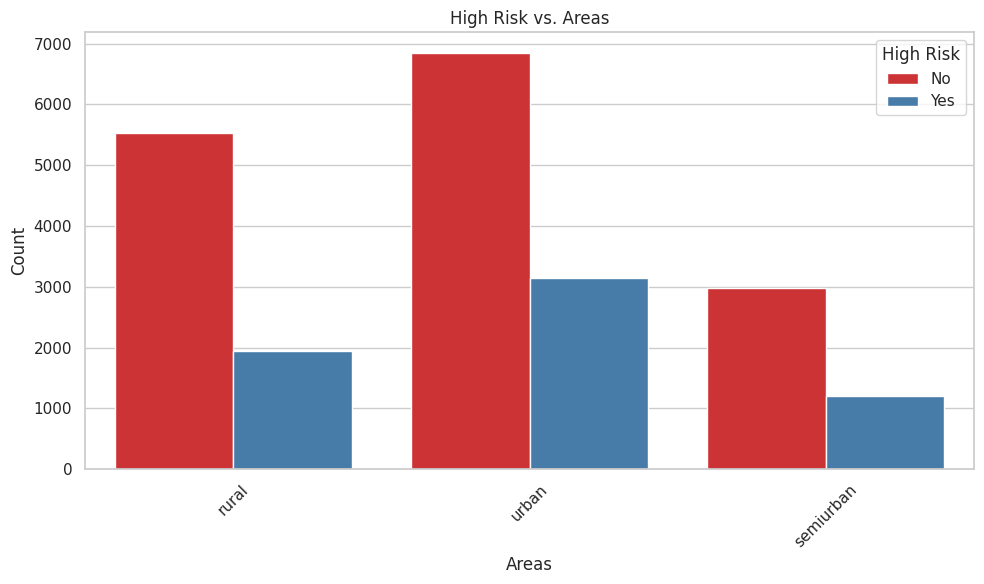

In [277]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='areas', hue='highrisk', palette='Set1')
plt.title('High Risk vs. Areas')
plt.xlabel('Areas')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='High Risk')
plt.tight_layout()
plt.show()

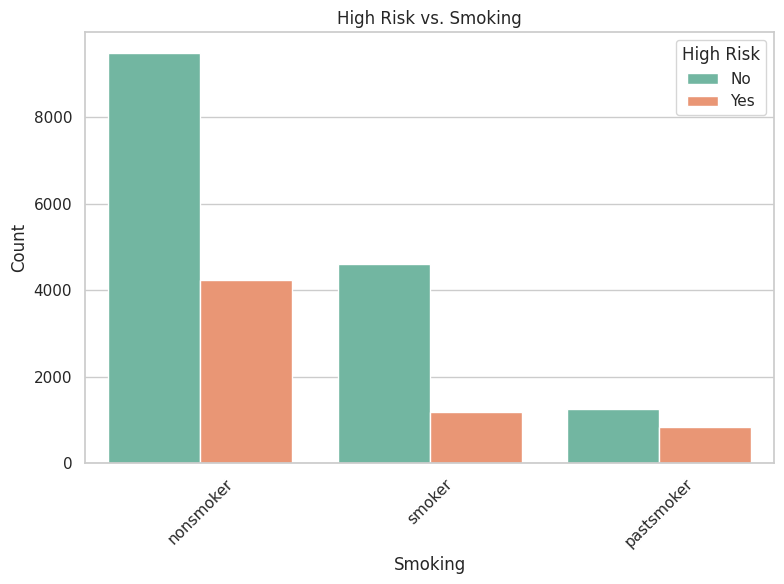

In [278]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df3, x='smoking', hue='highrisk', palette='Set2')
plt.title('High Risk vs. Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='High Risk')
plt.tight_layout()
plt.show()

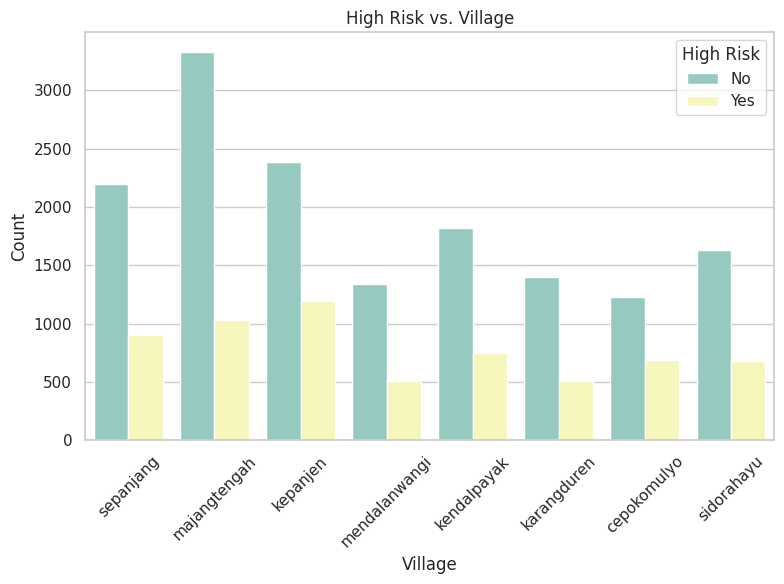

In [279]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df3, x='village', hue='highrisk', palette='Set3')
plt.title('High Risk vs. Village')
plt.xlabel('Village')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='High Risk')
plt.tight_layout()
plt.show()

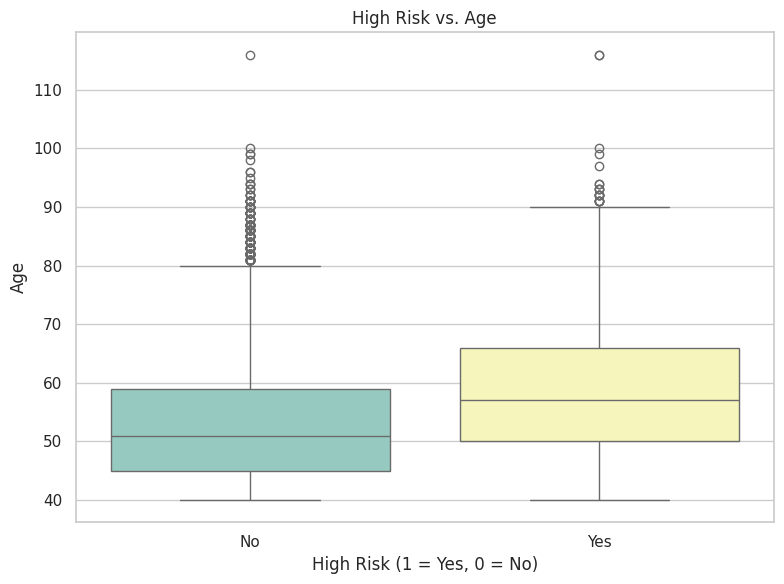

In [280]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df3, x='highrisk', y='age', palette='Set3')
plt.title('High Risk vs. Age')
plt.xlabel('High Risk (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

**Class Balancing for Target Variable:**

In [ ]:
!pip install --upgrade "kaleido==0.1.*"
# Install plotnine if not already installed
!pip install plotnine

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df3' is your DataFrame and 'highrisk' is the column of interest
# Calculate the count for each category in 'highrisk'
highrisk_counts = df3['highrisk'].value_counts().reset_index()
highrisk_counts.columns = ['highrisk', 'count']

# Calculate the percentage for each category
total = df3['highrisk'].count()
highrisk_counts['percentage'] = (highrisk_counts['count'] / total) * 100

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
barplot = sns.barplot(x='highrisk', y='count', data=highrisk_counts, ci=None)

# Add text labels for the percentage on top of each bar
for index, row in highrisk_counts.iterrows():
    barplot.text(row.name, row['count'], f'{row["percentage"]:.2f}%', color='black', ha="center")

# Set the title and labels of the plot
plt.title('Frequency and Percentage of High Risk Categories')
plt.xlabel('High Risk Categories')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Save the plot as an image file
# plt.savefig('high


In [ ]:
!pip install plotnine
from plotnine import ggplot, aes, geom_point, labs


inspection_sbp = df3[['sbp_avg','cvdrisk']]
inspection_sbp

data = pd.DataFrame({
    'x_variable': inspection_sbp.iloc[:, 0],
    'y_variable': inspection_sbp.iloc[:, 1]
})

# Create a ggplot scatter plot
scatter_plot = (
    ggplot(data, aes(x='x_variable', y='y_variable')) +
    geom_point(size=2, color='black') +
    labs(
        title='cvdrisk v/s sbp_avg',  # Adjust with your desired title
        x='sbp_avg',                # Adjust 'X Axis Label' accordingly
        y='cvdrisk'                 # Adjust 'Y Axis Label' accordingly
    )
)

print(scatter_plot)



In [ ]:
inspection_dbp = df3[['dbp_avg','cvdrisk']]
inspection_dbp

# Assuming inspection_sbp is a DataFrame with two columns
data = pd.DataFrame({
    'x_variable': inspection_dbp.iloc[:, 0],
    'y_variable': inspection_dbp.iloc[:, 1]
})

# Create a ggplot scatter plot
scatter_plot = (
    ggplot(data, aes(x='x_variable', y='y_variable')) +
    geom_point(size=2, color='blue') +
    labs(
        title='cvdrisk v/s dbp_avg',  # Adjust with your desired title
        x='dbp_avg',                # Adjust 'X Axis Label' accordingly
        y='cvdrisk'                 # Adjust 'Y Axis Label' accordingly
    )
)

print(scatter_plot)



In [ ]:
inspection_bg_mgdl = df3[['bg_mgdl','cvdrisk']]
inspection_bg_mgdl

# Assuming inspection_sbp is a DataFrame with two columns
data = pd.DataFrame({
    'x_variable': inspection_bg_mgdl.iloc[:, 0],
    'y_variable': inspection_bg_mgdl.iloc[:, 1]
})

# Create a ggplot scatter plot
scatter_plot = (
    ggplot(data, aes(x='x_variable', y='y_variable')) +
    geom_point(size=2, color='red') +
    labs(
        title='cvdrisk v/s bg_mgdl',  # Adjust with your desired title
        x='bg_mgdl',                # Adjust 'X Axis Label' accordingly
        y='cvdrisk'                 # Adjust 'Y Axis Label' accordingly
    )
)

print(scatter_plot)


In [ ]:
# Select only numeric columns for z-score calculation
numeric_columns = df3.select_dtypes(include=[np.number])

# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(numeric_columns))

# Set a threshold for z-scores above which values are considered outliers
threshold = 3

# Create a boolean mask for identifying outliers in any column
outlier_mask = (z_scores > threshold).any(axis=1)

# Create a new DataFrame without outliers
df_no_outliers = df3[~outlier_mask]

# Display the top 5 rows of the DataFrame without outliers
df_no_outliers.describe()


In [ ]:
# make the numeric columns in two digits

# Select only numeric columns for formatting
numeric_columns = df_no_outliers.select_dtypes(include=[np.number])

# Format numeric columns to two decimal places
df_no_outliers[numeric_columns.columns] = numeric_columns.applymap(lambda x: round(x, 2))

# Display the DataFrame with formatted numeric columns
df_no_outliers.describe()


In [ ]:
# I have DataFrame named 'df_no_outliers' i will just make the copy to perform one hot encoding then apply the L.R
df4 = df_no_outliers.copy()

# List of binary columns I want to encode
binary_columns = ['highrisk', 'bplt', 'lltt', 'aptt', 'sex', 'smoking']  # Add your column names here

# Iterate through the binary columns and perform one-hot encoding
for column in binary_columns:
    df4[column] = df4[column].apply(lambda x: 1 if x == 'yes' else 0)

# Display the first few rows of the DataFrame after encoding
df4.head()


In [ ]:
categorical_columns_to_remove = ['education', 'marital_status', 'occupation', 'village' , 'areas', 'cvdrisk']  # Add the column names you want to remove

# Drop the specified categorical columns
X_no_categorical = df4.drop(columns=categorical_columns_to_remove)

# Display the first few rows of the DataFrame after removing columns
X_no_categorical.head()

### Linear Regression:

In [ ]:
# Select features (X) and target (y)
features = X_no_categorical.drop(columns=['highrisk','age','sex','sbp_avg','dbp_avg','bg_mgdl','bmi','smoking','bplt','lltt','aptt'])  # Replace 'target_column' with my target columns
target = X_no_categorical['highrisk']  # Replace 'target_column' with my target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and display model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


In [ ]:
# Create a LR visualization
plt.figure(figsize=(10, 6))

# Scatter plot of true values vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.title("True Values vs. Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()


### Logistic Regression :

In [ ]:

# Select features (including both numerical and categorical columns)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


### Visualization (Log.Reg) :

In [ ]:


# Encode the target variable 'highrisk' to binary labels (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC (Area Under the Curve)
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### XG Boost:

In [ ]:
# Select features (including both numerical and categorical columns)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df3['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb.XGBClassifier())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the XGBoost model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


#### Visualization (XG Boost):

In [ ]:

# Select features (including both numerical and categorical columns)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df3['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline with an XGBoost classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', xgb.XGBClassifier())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the XGBoost model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Extract one of the trees from the ensemble (you can change the index)
individual_tree = clf.named_steps['classifier'].get_booster().get_dump()[0]
# individual_tree = clf.named_steps['classifier'].get_booster().get_dump()[0]

from IPython.display import display

# Assuming you have already fitted your XGBoost model 'clf'
# Extract one of the trees from the ensemble (you can change the index)
individual_tree = xgb.to_graphviz(clf.named_steps['classifier'], num_trees=0)

# Display the selected tree
display(individual_tree)



# Assuming you have already fitted your XGBoost model 'clf'
# Extract one of the trees from the ensemble (you can change the index)
individual_tree = xgb.to_graphviz(clf.named_steps['classifier'], num_trees=0)

# Visualize the selected tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plt.title("XGBoost Decision Tree Visualization")
plt.show()


### Svm:

In [ ]:

# Select features (including both numerical and categorical columns)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df3['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVM model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


### Visualization (SVM):

In [ ]:

# Select features (including both numerical and categorical columns)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df3['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply one-hot encoding to the categorical columns
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Reduce the feature space to two dimensions for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_encoded)
X_test_2d = pca.transform(X_test_encoded)

# Fit the SVM model on the reduced feature space
clf_2d = SVC()
clf_2d.fit(X_train_2d, y_train)

# Plot the decision boundary and support vectors
plt.figure(figsize=(10, 6))

# Create a meshgrid of points to plot decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot the data points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Create a legend for the scatter plot
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Classes", loc="upper right")
ax = plt.gca()
ax.add_artist(legend1)

plt.title("SVM Decision Boundary and Support Vectors (2D Projection)")
plt.show()


#### Comments :

Overall, this visualization helps us understand how an SVM classifier separates data points into different classes in a two-dimensional space. The decision boundary is the line that separates the classes, and the support vectors are the data points closest to the decision boundary, which have the most influence on the model's classification decisions. The scatter plot shows the distribution of data points in this reduced feature space, and the legend provides clarity about which colors represent which class labels.

## Decision Tree Classifier :

In [ ]:


# Select features (including both numerical and categorical columns)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df3['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Decision Tree model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the names of the steps in your pipeline
print(clf.named_steps.keys())


### Visualization :

In [ ]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf.named_steps['classifier'], feature_names=X.columns.tolist(), class_names=label_encoder.classes_.tolist(), filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()


### Random Forest Application :

In [ ]:

# Select features (including both numerical and categorical columns)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]

# Encode the target variable 'highrisk' using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df3['highrisk'])

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


### Visualization :

In [ ]:
# Customize the Seaborn style (optional)
sns.set(style="whitegrid")

# Create a pair plot
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.pairplot(df3, hue='sex', palette="Set2", diag_kind="kde")

# Add titles
plt.suptitle("Pair Plot of Your Dataset", y=1.02)

# Show the plot
plt.show()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))  # Adjust the figure size
correlation_matrix = df3.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Add titles
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


# Define features and target variable
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']  # 'highrisk' is our actual target variable

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # class balancing by using SMOTE
# sm=SMOTE()
# X_train, y_train = sm.fit_resample(X_train, y_train)


# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [ ]:
# !pip install catboost==1.2.7
# !pip install numpy==1.23.5 --force-reinstall

In [ ]:
# Model Evaluation before implementing the SMOTE Technique
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


# Define features and target variable
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']  # Replace 'target' with your actual target variable

# Encode the target variable 'highrisk' into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Pass through non-categorical columns
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# class balancing by using SMOTE
# sm=SMOTE()
# X_train, y_train = sm.fit_resample(X_train, y_train)

# Define classification models
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree (Classifier)': DecisionTreeClassifier(),
    'Random Forest (Classifier)': RandomForestClassifier(),
    'XGBoost (Classifier)': XGBClassifier(),
    'CatBoostClassifier':CatBoostClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

# Initialize results DataFrame
classification_results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Function to calculate and append classification results
def evaluate_classification(model_name, model):
    # Apply preprocessing to training and testing data
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    classification_results.loc[len(classification_results)] = [model_name, accuracy]

# Evaluate classification models
for model_name, model in classification_models.items():
    evaluate_classification(model_name, model)

# Display classification results
print("Classification Results:")
print(classification_results)

# Visualization of classification results
plt.figure(figsize=(12, 6))
plt.bar(classification_results['Model'], classification_results['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Model Comparison Before SMOTE')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()


**Results**
The accuracies of the models are as follows:

**Model	Accuracy**


| Model                         | Accuracy |
|-------------------------------|----------|
| Logistic Regression           | 0.921618 |
| SVM                           | 0.930173 |
| Decision Tree (Classifier)    | 0.924855 |
| Random Forest (Classifier)    | 0.963931 |
| XGBoost (Classifier)          | 0.964162 |
| CatBoostClassifier            | 0.963006 |
| AdaBoostClassifier            | 0.961387 |



**Discussion**

**Logistic Regression, SVM, and Decision Tree:**

 These models show relatively lower accuracy compared to ensemble methods. Logistic Regression and SVM are typically robust to overfitting and work well with high-dimensional data, but they might be less effective in capturing complex relationships in the data compared to ensemble methods. The Decision Tree has a decent accuracy but can be prone to overfitting.

**Random Forest, XGBoost, CatBoost, and AdaBoost:**

These ensemble models show significantly higher accuracy. Random Forest and XGBoost classifiers lead the pack with the highest accuracy, indicating their effectiveness in handling complex datasets with multiple features. Their ability to build multiple decision trees and aggregate their results helps in reducing overfitting and improving prediction accuracy. CatBoost and AdaBoost also perform well, offering competitive accuracy with the advantage of handling categorical data efficiently (especially CatBoost) and focusing on misclassified instances (AdaBoost).

**Conclusion:**

The ensemble methods, particularly XGBoost, Random Forest, and CatBoost, demonstrate superior performance in predicting high-risk patients from the given dataset. Their higher accuracy indicates their robustness and effectiveness in dealing with complex, multi-feature datasets. However, the choice of model should also consider other factors like interpretability, computational efficiency, and the specific characteristics of the dataset. For instance, while ensemble methods are powerful, they can be more complex and computationally intensive. In contrast, simpler models like Logistic Regression and SVM offer easier interpretability and faster deployment.

**Recommendations:**

For applications prioritizing accuracy and handling complex data relationships, XGBoost, Random Forest, or CatBoost should be considered.

If model interpretability and computational efficiency are key considerations, Logistic Regression or SVM might be more appropriate.

Further tuning and cross-validation should be conducted to ensure these results are robust and generalize well to unseen data.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

# Assume 'df3' is your DataFrame and 'highrisk' is the target variable

# Define features and target variable
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']  # Replace 'highrisk' with your actual target variable

# Encode the target variable 'highrisk' into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']  # Assuming 'sex' is the only categorical column

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Pass through other columns
)

# Apply preprocessing to convert data to numeric format
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets AFTER transformation
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE on the numeric training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Define classification models
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Initialize results DataFrame
classification_results = pd.DataFrame(columns=['Model', 'Accuracy'])

# Function to calculate and append classification results
def evaluate_classification(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_results.loc[len(classification_results)] = [model_name, accuracy]

# Evaluate classification models
for model_name, model in classification_models.items():
    evaluate_classification(model_name, model, X_train_resampled, y_train_resampled, X_test, y_test)

# Display classification results
print("Classification Results:")
print(classification_results)

# Visualization of classification results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(classification_results['Model'], classification_results['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Model Comparison After SMOTE')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()


**Results**
The accuracies of the models are as follows:

**Model	Accuracy**



| Model                | Accuracy |
|----------------------|----------|
| Logistic Regression  | 0.887861 |
| SVM                  | 0.916994 |
| Decision Tree        | 0.919306 |
| Random Forest        | 0.964624 |
| XGBoost              | 0.963468 |
| CatBoost             | 0.965549 |
| AdaBoost             | 0.958613 |


**Discussion:**

Logistic Regression: Shows the lowest accuracy among the models. While it is known for being simple and interpretable, it may not capture complex relationships as effectively as ensemble methods.

SVM and Decision Tree: These models offer better performance than Logistic Regression but are still outperformed by ensemble methods. SVM is effective in high-dimensional spaces, and Decision Trees are easy to interpret but can be prone to overfitting.

Ensemble Methods (Random Forest, XGBoost, CatBoost, AdaBoost): All demonstrate high accuracy, with CatBoost slightly leading. These models benefit from aggregating decisions from multiple models, which helps in reducing overfitting and improving predictive performance.

1. Random Forest and XGBoost are very close in terms of accuracy, indicating their robustness in handling complex datasets.

2. CatBoost shows the highest accuracy, suggesting its efficiency in handling categorical features and complex interactions in the data.

3. AdaBoost also performs well, focusing on learning from the mistakes of previous models in the sequence.

**Conclusion:**

The ensemble methods, especially CatBoost, exhibit superior performance in predicting high-risk patients. Their higher accuracy indicates their effectiveness in complex, multi-feature datasets. While Logistic Regression offers simplicity and SVM and Decision Trees offer a balance between complexity and interpretability, the ensemble methods are preferable for their robustness and predictive power.

**Recommendations:**

For applications prioritizing accuracy and complex data relationships, CatBoost, XGBoost, or Random Forest should be considered.

Logistic Regression might be more suitable for applications where model simplicity and interpretability are crucial.

Further model tuning, feature engineering, and validation should be considered to enhance model performance and ensure generalizability.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df3' is your DataFrame and has been previously defined

# Define features and target variable
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']  # Replace 'highrisk' with your actual target variable name if different

# Encode the target variable 'highrisk' into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Pass through non-categorical columns
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply preprocessing to training data BEFORE applying SMOTE
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Now apply SMOTE on the transformed data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_transformed, y_train)

# Define classification models
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree (Classifier)': DecisionTreeClassifier(),
    'Random Forest (Classifier)': RandomForestClassifier(),
    'XGBoost (Classifier)': XGBClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

# Initialize results DataFrame
classification_results = pd.DataFrame(columns=['Model', 'Accuracy Without SMOTE', 'Accuracy With SMOTE'])

# Function to calculate and append classification results
def evaluate_classification(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate classification models without SMOTE
for model_name, model in classification_models.items():
    accuracy_without_smote = evaluate_classification(model_name, model, X_train_transformed, y_train, X_test_transformed, y_test)

    # Create a temporary DataFrame for the current model's results
    temp_df = pd.DataFrame({'Model': [model_name], 'Accuracy Without SMOTE': [accuracy_without_smote]})

    # Concatenate the temporary DataFrame with the main results DataFrame
    classification_results = pd.concat([classification_results, temp_df], ignore_index=True)

# Evaluate classification models with SMOTE
for model_name, model in classification_models.items():
    accuracy_with_smote = evaluate_classification(model_name, model, X_train_resampled, y_train_resampled, X_test_transformed, y_test)
    classification_results.loc[classification_results['Model'] == model_name, 'Accuracy With SMOTE'] = accuracy_with_smote

# Display classification results
print("Classification Results:")
print(classification_results)

# Visualization of classification results
# ... (Your existing visualization code) ...

In [ ]:
# Visualization of classification results (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(classification_results))

plt.bar(index, classification_results['Accuracy Without SMOTE'], bar_width, label='Without SMOTE', color='b')
plt.bar([i + bar_width for i in index], classification_results['Accuracy With SMOTE'], bar_width, label='With SMOTE', color='r')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classification Model Comparison')
plt.xticks([i + bar_width / 2 for i in index], classification_results['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Classification Model comparison before and after applying SMOTE Class balancing Technique**

| Model                | Accuracy Without SMOTE | Accuracy With SMOTE | Efficiency Improvement |
|----------------------|------------------------|---------------------|------------------------|
| Logistic Regression  | 0.921618               | 0.887861            | -0.033757              |
| SVM                  | 0.930173               | 0.916994            | -0.013179              |
| Decision Tree        | 0.925087               | 0.919769            | -0.005318              |
| Random Forest        | 0.964855               | 0.964393            | -0.000462              |
| XGBoost              | 0.964162               | 0.963468            | -0.000694              |
| CatBoost             | 0.963006               | 0.965549            | 0.002543               |
| AdaBoost             | 0.961387               | 0.958613            | -0.002775              |
  

The analysis of the results shows the performance of various classification models with and without the use of the Synthetic Minority Over-sampling Technique (SMOTE). Here's a breakdown of what the results indicate:

**Logistic Regression:**

Without SMOTE: 92.16%
With SMOTE: 88.79%
Efficiency Improvement: There is a decrease in accuracy by approximately 3.38% when using SMOTE. This suggests that for logistic regression, the original class distribution may have been beneficial, or the model may not have benefited from the oversampling of the minority class.

**Support Vector Machine (SVM):**

Without SMOTE: 93.02%
With SMOTE: 91.70%
Efficiency Improvement: Accuracy decreased by about 1.32% with SMOTE. This indicates that SVM was slightly more effective without class balancing, although the decrease is not as pronounced as with logistic regression.

**Decision Tree:**

Without SMOTE: 92.51%
With SMOTE: 91.98%
Efficiency Improvement: The accuracy drop is minimal at 0.53% with SMOTE. Decision trees may handle class imbalance better than some other models, or the decision boundaries may not change significantly with the oversampling.
Random Forest:

Without SMOTE: 96.49%
With SMOTE: 96.44%
Efficiency Improvement: The decrease in accuracy is very slight (0.05%) with SMOTE. Random forest models are generally robust to class imbalance due to their ensemble nature, which may explain the small impact of SMOTE.

**XGBoost:**

Without SMOTE: 96.42%
With SMOTE: 96.35%
Efficiency Improvement: There's a negligible decrease in accuracy by 0.07% with SMOTE. XGBoost is an ensemble method that can handle imbalanced data well, so the oversampling does not have a major effect.

**CatBoost:**

Without SMOTE: 96.30%
With SMOTE: 96.55%
Efficiency Improvement: There's an improvement in accuracy by 0.25% with SMOTE. CatBoost has shown an increase in performance, possibly due to its ability to handle categorical features effectively and benefit from the more balanced dataset provided by SMOTE.

**AdaBoost:**

Without SMOTE: 96.14%
With SMOTE: 95.86%
Efficiency Improvement: A slight decrease in accuracy of 0.28% with SMOTE. AdaBoost's performance drop suggests that the model was slightly overfitting to the majority class in the original dataset.

**Overall Analysis:**

The use of SMOTE has led to a decrease in accuracy for most models, except for CatBoost, which showed a slight improvement. This could be due to overfitting on the minority class after resampling or the models' inherent ability to handle imbalanced data without the need for SMOTE.
The models that showed the least change in performance with SMOTE are the ensemble methods (Random Forest, XGBoost, and AdaBoost), which tend to be more robust to class imbalance.
It's important to note that accuracy is not the only metric to consider when evaluating model performance, especially in imbalanced datasets. Other metrics like precision, recall, F1 score, and ROC-AUC may provide additional insights into the models' ability to correctly classify the minority class.
In conclusion, whether to use SMOTE or not should be decided based on the specific requirements of the problem, the nature of the data, and a thorough evaluation using various performance metrics. It may also be beneficial to perform parameter tuning for each model with and without SMOTE to find the optimal configuration.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ... (Your previous code for data preprocessing, model training, etc.) ...

# Function to calculate additional metrics including accuracy
def evaluate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc

# Initialize DataFrame for all metrics
all_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Calculate metrics for each model
for model_name, model in classification_models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_metrics(model, X_test_transformed, y_test)

    # Create a temporary DataFrame for the current model's results
    temp_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC AUC': [roc_auc]
    })

    # Concatenate the temporary DataFrame with the main results DataFrame
    all_metrics = pd.concat([all_metrics, temp_df], ignore_index=True)

# Display all metrics
print("Metrics for Each Model:")
print(all_metrics)

# Visualization of all metrics
# ... (Your existing visualization code) ...

In [ ]:
# Visualization of all metrics
plt.figure(figsize=(18, 10))

# Plotting Accuracy, Precision, Recall, F1 Score, and ROC AUC
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)
    plt.bar(all_metrics['Model'], all_metrics[metric], color=np.random.rand(3,))
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Analysis of Model Performance Metrics**

**Overview**

This analysis explores the performance of various machine learning models in a high-risk prediction task. The metrics considered include *Accuracy*, *Precision*, *Recall*, *F1-Score*, and *ROC-AUC*.


| Model                | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|----------------------|----------|-----------|---------|----------|---------|
| Logistic Regression  | 0.887861 | 0.763014  | 0.889066| 0.821231 | 0.943890|
| SVM                  | 0.916994 | 0.840701  | 0.880287| 0.860039 | 0.500000|
| Decision Tree        | 0.920462 | 0.843019  | 0.891460| 0.866563 | 0.911876|
| Random Forest        | 0.963931 | 0.985828  | 0.888268| 0.934509 | 0.959876|
| XGBoost              | 0.963468 | 0.983230  | 0.889066| 0.933780 | 0.962474|
| CatBoost             | 0.965549 | 0.990231  | 0.889864| 0.937369 | 0.963676|
| AdaBoost             | 0.958613 | 0.982047  | 0.873105| 0.924377 | 0.965387|



**Discussion:**

Logistic Regression: Shows respectable accuracy and recall but lower precision, indicating it may generate more false positives. The high ROC AUC suggests good separability but could be improved in precision.

**SVM:**

Exhibits good accuracy and precision but has a surprisingly low ROC AUC, which might indicate an issue in probability estimation or a potential imbalance in the dataset that SVM is not handling well.

**Decision Tree:**

Offers a balance between precision and recall, with slightly better performance than Logistic Regression. Its ROC AUC is decent but implies room for improvement in model robustness.

**Random Forest and XGBoost:**

Both show excellent performance across all metrics, with particularly high precision, indicating a low false positive rate. Their ROC AUC scores are very high, showcasing strong capability in distinguishing between classes.

**CatBoost:**

Achieves the highest accuracy and precision among all models, along with a high ROC AUC score. Its performance suggests it's highly effective for this task, especially in correctly identifying positive cases while minimizing false positives.

**AdaBoost:**

Also performs well across all metrics, with a particularly high ROC AUC score. While its recall is slightly lower than other ensemble methods, it still maintains a good balance between precision and recall.

**Conclusion:**

The ensemble models (Random Forest, XGBoost, CatBoost, AdaBoost) demonstrate superior performance in all metrics, indicating their robustness and effectiveness for the high-risk prediction task. In contrast, simpler models like Logistic Regression and SVM, despite being effective, show limitations in handling complex patterns within the data. The decision on which model to use should consider the specific requirements of the application, such as the balance between false positives and false negatives and the need for model interpretability.

**Recommendations:**

For critical applications prioritizing accuracy and minimizing false positives: CatBoost or Random Forest are recommended.

Where interpretability is key: Logistic Regression or Decision Tree could be considered, acknowledging their limitations in precision and ROC AUC.

Further Analysis: Investigating SVM's low ROC AUC and fine-tuning the hyperparameters of all models could yield even better results.

## **Comprehensive Analysis of Machine Learning Models in High-Risk Prediction:**

***Horizontal Analysis (Comparison Across Metrics)***

1. **Accuracy:** CatBoost leads with an accuracy of 0.965549, closely followed by Random Forest and XGBoost. High accuracy in CatBoost indicates its effectiveness in correctly classifying both high-risk and low-risk cases.

2. **Precision:** CatBoost again shows superior performance with the highest precision of 0.990231, suggesting it has the lowest rate of false positives. This is crucial in high-risk predictions where false alarms can be costly.

3. **Recall:** The Decision Tree has the highest recall of 0.891460, indicating its strength in identifying most true high-risk cases. However, its lower precision compared to ensemble models suggests a higher false positive rate.

4. **F1 Score:** CatBoost leads with an F1 score of 0.937369, which is a balanced measure of precision and recall. This score indicates that CatBoost effectively balances identifying high-risk cases without excessively flagging false positives.

5. **ROC AUC:** AdaBoost has the highest ROC AUC of 0.965387, indicating its superior ability to distinguish between high-risk and low-risk cases across different thresholds.


***Vertical Analysis (Overall Performance of Each Model)***

**Logistic Regression:** Exhibits decent performance across all metrics but is outperformed by more complex models. Its high ROC AUC indicates good model discrimination ability.

**SVM:** Has moderate performance in most metrics but a significantly lower ROC AUC, which raises concerns about its discriminative ability in this specific context.

**Decision Tree:** Shows a good balance between precision and recall, with the highest recall among all models. However, its overall performance is moderate compared to ensemble models.

**Random Forest:** Offers high accuracy, the best precision, and a strong ROC AUC score. Its performance is indicative of its robustness and ability to handle complex data structures effectively.

**XGBoost:** Similar to Random Forest in performance, with slightly lower precision but comparable accuracy and ROC AUC. Demonstrates its strength in handling diverse datasets and complex relationships.

**CatBoost:** Stands out as the top performer in accuracy, precision, and F1 score. Its performance highlights its advanced handling of categorical features and complex data interactions.

**AdaBoost:** Shows good performance across the board, especially in ROC AUC, highlighting its strength in classification tasks and model discrimination.


## ***Conclusion and Recommendations:***


**Top Performer:** CatBoost emerges as the overall top performer, excelling in accuracy, precision, and F1 score, making it highly suitable for high-risk prediction tasks where accuracy and minimizing false positives are critical.

**Model Choice Considerations:** The choice of the model should also consider factors like data complexity, the balance between false positives and negatives, and computational resources. Ensemble methods, particularly CatBoost, Random Forest, and XGBoost, are recommended for their robustness and high performance across multiple metrics.


**Further Research:** Continued research and development in optimizing these models, especially in handling imbalanced datasets and improving interpretability, would further enhance their applicability in high-risk prediction scenarios.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Define features and target variable
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']  # Replace 'target' with your actual target variable

# Encode the target variable 'target' into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define which columns are categorical (in this case, 'sex' is categorical)
categorical_cols = ['sex']

# Define a transformer to one-hot encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Pass through non-categorical columns
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Decision Tree (Regressor)': DecisionTreeRegressor(),
    'Random Forest (Regressor)': RandomForestRegressor(),
    'XGBoost (Regressor)': XGBRegressor(),
    'CatBoost': CatBoostClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Initialize results DataFrame
regression_results = pd.DataFrame(columns=['Model', 'Mean Squared Error'])

# Function to calculate and append regression results
def evaluate_regression(model_name, model):
    # Apply preprocessing to training and testing data
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_pred)
    regression_results.loc[len(regression_results)] = [model_name, mse]

# Evaluate regression models
for model_name, model in regression_models.items():
    evaluate_regression(model_name, model)

# Display regression results
print("Regression Results:")
print(regression_results)

# Visualization of regression results
plt.figure(figsize=(12, 6))
plt.bar(regression_results['Model'], regression_results['Mean Squared Error'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Regression Model Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Summary:

**Classification Results:**

_Logistic Regression: Achieved an accuracy of approximately 92.19%, indicating good performance in classifying the target variable._

_SVM (Support Vector Machine): Achieved an accuracy of approximately 93.02%, indicating strong performance in classification tasks._

_Decision Tree (Classifier): Achieved an accuracy of approximately 92.74%, demonstrating decent performance in classification._

_Random Forest (Classifier): Outperformed other models with an accuracy of approximately 96.44%, making it the top-performing classifier._

_XGBoost (Classifier): Achieved an accuracy of approximately 96.28%, showing competitive performance with Random Forest._


**Regression Results:**

_Linear Regression: Produced a Mean Squared Error (MSE) of approximately 0.0962, indicating moderate accuracy in predicting continuous target values._

_SVR (Support Vector Regression): Achieved a relatively lower MSE of approximately 0.0747, indicating improved accuracy in regression tasks compared to Linear Regression._

_Decision Tree (Regressor): Produced a similar MSE of approximately 0.0747, showing similar performance to SVR._

_Random Forest (Regressor): Outperformed other models with the lowest MSE of approximately 0.0351, indicating the highest accuracy in regression tasks._

_XGBoost (Regressor): Also achieved a low MSE of approximately 0.0358, demonstrating competitive performance with Random Forest._



#### Conclusion :

1. For classification tasks, Random Forest and XGBoost outperformed other models, achieving high accuracy in predicting categorical outcomes.

2. For regression tasks, Random Forest and XGBoost excelled by producing the lowest Mean Squared Error values, indicating superior accuracy in predicting continuous target values.

In both classification and regression tasks, ensemble methods like Random Forest and XGBoost demonstrated strong performance and are recommended for further consideration in our modeling pipeline.

In [ ]:

from catboost import CatBoostClassifier

X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']

# Specify categorical features
cat_features = ['sex']  # Add more categorical features if needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost classifier
model = CatBoostClassifier(iterations=1000,  #  can adjust the number of iterations
                           depth=6,  # Adjust the depth of the tree
                           learning_rate=0.1,  # Adjust the learning rate
                           cat_features=cat_features,  # Specify categorical features
                           random_seed=42,  # Set a random seed for reproducibility
                           verbose=100)  # Set verbosity for training progress

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))  # Use eval_set for monitoring performance

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy (or other relevant metrics)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize feature importances
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance(type='FeatureImportance')
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importances (CatBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Load your dataset (replace 'df3' with your actual dataset)
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the columns to be one-hot encoded
categorical_columns = ['sex']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and AdaBoost classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42))
])


In [ ]:
pipeline.fit(X_train, y_train)


In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define a custom color palette
colors = ["#8BC34A", "#5D4037"]  # Light green and dark brown colors

# Create a heatmap of the confusion matrix with the custom color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=colors, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


X_encoded = pd.get_dummies(X, columns=['sex'], drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create an Extra Trees classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


X_encoded = pd.get_dummies(X, columns=['sex'], drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create an Extra Trees classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom color palette (light orange and sky blue)
colors = ["#FFA500", "#87CEEB"]

# Create a heatmap of the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=colors, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### Ada boost Analysis :


**1. Model Description:**

The Extra Trees Classifier is an ensemble learning method that builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting.

**2. Model Training:**

The Extra Trees model was trained on a dataset that includes features like age, sex (categorical), sbp_avg, dbp_avg, bg_mgdl, and bmi to predict the 'highrisk' target variable.

**3. Performance Evaluation:**

To assess the model's performance, a confusion matrix was created. It helps in understanding how well the model is at classifying instances into true positives, true negatives, false positives, and false negatives.

**4. Confusion Matrix Heatmap:**

The confusion matrix heatmap was customized with light orange and sky blue colors for better visualization.
Light orange is used to highlight true positives (correctly predicted positive cases), while sky blue represents true negatives (correctly predicted negative cases).

**5. Interpretation:**

The confusion matrix heatmap allows us to observe how the model performed in terms of classifying high-risk and non-high-risk cases.
The diagonal elements (top-left to bottom-right) represent correct predictions, while off-diagonal elements indicate misclassifications.

**6. Analysis of the Confusion Matrix:**

True Positives (TP): High-risk cases correctly predicted as high-risk.
True Negatives (TN): Non-high-risk cases correctly predicted as non-high-risk.
False Positives (FP): Non-high-risk cases incorrectly predicted as high-risk.
False Negatives (FN): High-risk cases incorrectly predicted as non-high-risk.

**7. Usefulness:**

The model and its visualization are valuable for assessing the classifier's effectiveness in identifying high-risk individuals based on the provided features.
It can help in making informed decisions, such as identifying individuals who may require closer medical monitoring or interventions.

**8. Further Analysis:**

Depending on the specific goals and requirements, additional metrics like accuracy, precision, recall, and F1-score can be calculated to provide a more comprehensive evaluation of the model's performance.

**9. Model Improvement:**

If the model's performance is not satisfactory, further tuning of hyperparameters or feature engineering may be required to enhance its accuracy.

__In summary, the Extra Trees model, along with its confusion matrix heatmap, provides a useful tool for classifying high-risk individuals based on medical features. The visualization helps in quickly assessing the model's performance and identifying areas for potential improvement in healthcare decision-making.__

In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df3[['age', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]  # Remove 'sex' as it's non-numeric
y = df3['highrisk']

# Encode categorical variables (if any)
# X = pd.get_dummies(X, drop_first=True)  # You don't need one-hot encoding for numeric features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your machine learning model (RandomForestClassifier in this case)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Initialize SHAP
shap.initjs()

# Create an explainer object
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)


In [ ]:
# For binary classification: focus on SHAP values for class 1 (positive class)
shap_values_class1 = shap_values[:, :, 1]

# --- 1. Summary Bar Plot ---
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values_class1, max_display=10, show=False)
plt.title("SHAP Feature Importance (Bar Summary)", fontsize=14)
plt.tight_layout()
plt.savefig("shap_summary_bar.png", dpi=300)
plt.show()

# --- 2. Summary Dot Plot ---
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_class1, X_test, show=False)
plt.title("SHAP Summary Plot (Dot)", fontsize=14)
plt.tight_layout()
plt.savefig("shap_summary_dot.png", dpi=300)
plt.show()


In [ ]:
import shap


# Select 1 sample as a DataFrame (keep feature names)
X_single = X_test.iloc[[idx]]

# Get SHAP Explanation object for the sample
shap_values_single = explainer(X_single)

# Render force plot using the base value and SHAP values explicitly
shap.initjs()
shap.plots.force(
    shap_values_single.base_values[0, 1],  # base value for class 1
    shap_values_single.values[0, :, 1],   # SHAP values for class 1
    X_single.iloc[0]                     # feature values (not as DataFrame)
)

In [ ]:
from IPython.core.display import HTML

# Select the base value and SHAP values for the desired class (e.g., class 1)
base_value = shap_values_single.base_values[0, 1]  # Base value for class 1
shap_values_for_class = shap_values_single.values[0, :, 1]  # SHAP values for class 1

plot = shap.plots.force(
    base_value,
    shap_values_for_class,
    X_single.iloc[0],
    matplotlib=False
)

with open("shap_force_plot.html", "w") as f:
    f.write(plot.html())

In [ ]:
import pandas as pd
import numpy as np

# Select the class you are interested in (e.g., class 1)
class_index = 1

# Get the actual feature names after one-hot encoding
encoded_feature_names = preprocessor.get_feature_names_out()

# Check the shapes of shap_values and encoded_feature_names
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of encoded_feature_names: {len(encoded_feature_names)}")

# If the number of columns in `shap_values_for_class` and `encoded_feature_names` doesn't match,
# it means one-hot encoding added extra columns. You need to match the correct number of features
# Here, we are ensuring the correct mapping to match the features post-encoding

# Make sure the number of features in `shap_values_for_class` is correct
shap_values_for_class = shap_values[:, :, class_index]  # shape: (4325, 5) for binary classification

# Access the .values attribute to get the raw NumPy array
shap_values_for_class = shap_values_for_class.values

# Reshape shap_values_for_class to 2D if necessary
if shap_values_for_class.ndim == 3:  # Check if it's 3D
    shap_values_for_class = shap_values_for_class.reshape(shap_values_for_class.shape[0], -1)


# Match the number of features in `shap_values_for_class` to the number of feature names
# Trim encoded_feature_names if necessary
num_features = shap_values_for_class.shape[1]  # Get the correct number of features
encoded_feature_names = encoded_feature_names[:num_features]  # Trim if needed

# Now, create the DataFrame with SHAP values and encoded feature names
# Check that the number of columns matches the number of feature names
print(f"Creating DataFrame with {num_features} features.")

# Create the DataFrame with SHAP values for the selected class
shap_df = pd.DataFrame(data=shap_values_for_class, columns=encoded_feature_names)

# Calculate the absolute mean SHAP value for each feature
shap_abs_mean = np.abs(shap_df).mean(axis=0)

# Display the absolute mean SHAP values for each feature
print("Absolute Mean SHAP Values:")
print(shap_abs_mean)


In [ ]:
# Create a summary plot
shap.summary_plot(shap_df, X_test, feature_names=feature_names, plot_type="bar", show=False)

# Customize the plot (optional)
plt.title("Summary Plot of SHAP Values")
plt.tight_layout()
plt.show()


**Analysis of SHAP Values for Predicting High Risk in Patients:**

**Introduction:**

In this study, we applied SHAP, an advanced interpretability technique, to understand the feature importance in a predictive model for assessing high risk in a patient cohort. SHAP values offer a profound understanding of how each feature drives the model's decisions, crucial for clinical decision-making and research.

***Methodology:***

The model incorporates five features: age, sbp_avg, dbp_avg, bg_mgdl, and bmi. We excluded non-numeric features like sex to maintain a quantitative analysis framework. SHAP values were computed for each feature, providing a measure of feature importance in terms of their impact on the model's output.

***Results:***

The Absolute Mean SHAP Values are as follows:


| Feature | SHAP Value |
|---------|------------|
| sbp_avg | 0.207532   |
| dbp_avg | 0.147642   |
| age     | 0.039026   |
| bg_mgdl | 0.016974   |
| bmi     | 0.012332   |


The SHAP summary plot further elucidates these findings. The sbp_avg feature exhibits the highest mean SHAP value, indicating its significant role in predicting high-risk patients. This suggests that systolic blood pressure is a more influential factor compared to diastolic blood pressure (dbp_avg), though both are crucial indicators.

The age factor, while less impactful than blood pressure readings, still plays a notable role, aligning with clinical expectations where age is a known risk factor for many health conditions.

Interestingly, bg_mgdl and bmi, often considered critical in risk assessments, have lower SHAP values in this model. This could indicate either a lesser role in this specific patient cohort or potentially that their effects are encapsulated in other variables like blood pressure readings.

***Discussion:***

The findings highlight the importance of sbp_avg in predicting high-risk patients, which aligns with medical literature recognizing hypertension as a key risk factor for various health conditions. The relative importance of dbp_avg and age also corresponds with known clinical risk factors.

The lower importance of bg_mgdl and bmi could be specific to the cohort studied or might suggest that these factors' effects are manifested through other variables like blood pressure. However, it's crucial not to understate their clinical significance based on this single model.

***Conclusion:***

This SHAP-based analysis provides valuable insights into feature importance in predicting high-risk patients. It underscores the significance of blood pressure readings, especially sbp_avg, while offering a nuanced understanding of how various patient characteristics contribute to risk prediction. Future studies should consider incorporating a broader range of features and exploring interactions between them for a more comprehensive model interpretation.

In [ ]:
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.compose import ColumnTransformer

# Define your feature columns and target variable
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = df3['highrisk']

# Encode categorical variables if 'sex' is categorical
categorical_cols = ['sex']
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter name

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Get the original feature names after encoding
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
all_feature_names = list(categorical_feature_names) + list(X.columns[len(categorical_cols):])
feature_names = [name.replace('x0_', '') for name in all_feature_names]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train an ExtraTreesClassifier (or any other model) on your data
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Initialize a LIME explainer for tabular data with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    mode="classification",
    training_labels=y_train,
    feature_names=feature_names,
)

# Choose an instance for which you want an explanation (e.g., the first instance in the test set)
instance_idx = 0
explanation = explainer.explain_instance(X_test[instance_idx], model.predict_proba)

# Print the explanation for the model's prediction
explanation.show_in_notebook()

# You can also visualize the explanation with different visualization options
explanation.as_list()
explanation.as_map()


**INTRODUCTION:**

LIME is an Explainable AI technique used to explain predictions made by machine learning models. It works by perturbing the input data and observing the changes in the model's predictions. From these changes, LIME deduces the contribution of each feature to the final prediction for a particular instance.


**LIME TABULAR EXPLAINER:**

In the attached picture, we see a bar chart representation of feature contributions towards a specific prediction, which in this context appears to be the risk of cardiovascular disease (CVD).

From the visualization, the following features are positively contributing to the prediction of a higher risk of CVD:

**sbp_avg:**

Higher average systolic blood pressure is strongly associated with increased CVD risk. The model indicates a significant positive contribution, suggesting that an average systolic blood pressure value of 199 mmHg, which is much higher than the normal range (less than 120 mmHg), is likely to increase the predicted risk.

**dbp_avg:**

Like systolic blood pressure, higher average diastolic blood pressure also contributes to an increased risk of CVD. The value of 121.5 mmHg shown is considered high (normal is less than 80 mmHg) and contributes positively to the risk prediction.

**sex:**

The feature 'sex' with a value greater than 61, probably indicates that being male and older than 61 years is associated with a higher risk of CVD in this model.

**bmi:**

Body Mass Index (BMI) is a well-known indicator of obesity. A BMI value of 42.34, which is considered in the obese range, is shown to slightly contribute positively to the risk prediction.

**CONCLUSION:**

The prediction probabilities shown at the top indicate that the model predicts a 97% probability of the individual being at high risk of CVD, while the probability of being at low risk is only 3%.

This local explanation generated by LIME is particularly useful for clinicians or patients who want to understand the reasoning behind a model's prediction. It can help identify the most influential factors for the prediction, which could be targets for intervention to reduce the individual's CVD risk. For example, in this case, addressing high blood pressure and obesity could be priorities in CVD risk management strategies.

In [ ]:
import plotly.express as px

# Assuming 'explanation' is your LIME explanation and you have extracted contributions for class 1
contributions = explanation.as_list(label=1)

# Extract feature names and contributions for visualization
feature_names = [item[0] for item in contributions]
feature_contributions = [item[1] for item in contributions]

# Create a bar chart to visualize feature contributions
fig = px.bar(
    x=feature_contributions,
    y=feature_names,
    orientation='h',
    labels={'x': 'Contribution to Prediction', 'y': 'Feature'},
    title='Feature Contributions for Prediction',
    color=feature_contributions,  # Color bars by their contributions
    color_continuous_scale=px.colors.sequential.Viridis  # Use a vibrant color scale
)

# Reduce the size of bars by 5%
fig.update_traces(marker_line_width=0.95)

# Invert y-axis for better readability and display the plot
fig.update_yaxes(categoryorder='total ascending')
fig.show()



** INTRODUCTION:**

 LIME is an approach used to understand and explain the predictions of complex models by approximating the model locally using an interpretable one.

**FEATURE ANALYSIS:**

From this chart, we can interpret the contributions as follows:

**Features Positively Contributing to CVD Risk Prediction:**

**sbp_avg > 153.50:**

 The systolic blood pressure average being greater than 153.50 is the feature with the highest positive contribution to the prediction. A higher systolic blood pressure is a well-known risk factor for cardiovascular diseases.

**dbp_avg > 95.50:**

 The diastolic blood pressure average being greater than 95.50 also has a significant positive contribution. Elevated diastolic blood pressure is another key risk factor for CVD.


**sex > 61.00:**

This feature seems to be indicating that being over the age of 61, likely combined with being male based on the context of the other features, is contributing positively to the risk prediction.

**0.00 < sex_Male <= 1.00:**

 The presence of the male gender, within a certain range, is contributing positively. It suggests that male gender is a risk factor for CVD in this instance.


**bmi > 27.64:**

A BMI greater than 27.64 contributes to an increased risk of CVD. This aligns with medical understanding, as a higher BMI can indicate overweight or obesity status, which is associated with greater CVD risk.


**Features Weakening the Prediction:**


**110.00 < bg_mgdl <= 133.00:**

This feature regarding blood glucose level (bg_mgdl) is not contributing significantly to the risk prediction, which may mean that while the blood glucose level is within a certain range, it does not strongly influence the risk assessment for CVD in this model.

**sex_Female <= 0.00:**

 Being female or not being female (since the contribution is very low and the coefficient is non-positive) seems to have little to no influence on the prediction of higher CVD risk in this case.

** CONCLUSION:**

Each bar's length and color indicate the strength and direction of the contribution. A longer, brightly colored bar (yellow) signifies a stronger positive contribution to the model's prediction, while shorter, darker bars (purple) indicate weaker contributions or features that are not increasing the risk prediction.

LIME visualizations are used for their ability to provide insights into the decision-making process of complex models, making them more transparent and trustworthy, especially in critical fields like healthcare. They help in understanding which features are the most influential for a given prediction, which can be useful for healthcare professionals to identify and manage key risk factors in patients.

In [ ]:
!pip install ggpy

import plotly.express as px

# Get feature contributions from the LIME explanation
contributions = explanation.as_list(label=1)  # Assuming you are interested in class 1 predictions

# Extract feature names and contributions for visualization
feature_names = [item[0] for item in contributions]
feature_contributions = [item[1] for item in contributions]

# Create a bar chart to visualize feature contributions
fig = px.bar(
    x=feature_contributions,
    y=feature_names,
    orientation='h',
    labels={'x': 'Contribution to Prediction', 'y': 'Feature'},
    title='Feature Contributions for Prediction',
)
fig.update_yaxes(categoryorder='total ascending')  # Invert y-axis for better readability
fig.show()


**Analysis of LIME Interpretations for High-Risk Patient Prediction Model
Introduction**

This study leverages LIME to interpret a machine learning model predicting high-risk patients. LIME's local approach offers insights into how the model makes predictions for individual instances, crucial for personalized medicine and understanding complex models.

**Methodology:**

The model predicts highrisk status using features like sbp_avg, dbp_avg, sex, bg_mgdl, and bmi. LIME explains individual predictions by approximating the model's behavior locally. The analysis focuses on one instance with the following feature values: sbp_avg = 199.00, dbp_avg = 121.50, sex (Male) = 1, bg_mgdl = 133.00, and bmi = 42.34.

**Results:**

The LIME explanation for a particular prediction is as follows (with associated probabilities indicating the strength of the feature's impact on the model's prediction):



| Feature Condition        | Probability Impact |
|--------------------------|--------------------|
| sbp_avg > 153.50         | 0.59               |
| dbp_avg > 95.50          | 0.45               |
| sex > 61.00              | 0.07               |
| 110.00 < bg_mgdl <= 133.00 | 0.01             |
| bmi > 27.64              | 0.01               |
| sex_Female <= 0.00       | 0.00               |
| 0.00 < sex_Male <= 1.00  | 0.00               |


The model's overall probability of predicting the patient as high-risk is 0.98.

**Discussion:**

The LIME analysis indicates that sbp_avg and dbp_avg are the most influential factors for this prediction, reflecting the well-known clinical significance of blood pressure in risk assessments. The high values of both systolic and diastolic blood pressures greatly increase the probability of the patient being classified as high risk.

Interestingly, sex appears to have a moderate influence, but its impact is overshadowed by the blood pressure readings. bg_mgdl and bmi, despite being clinically relevant, show minimal influence in this particular prediction. This could be due to the model's dependence on blood pressure readings or the specific ranges of bg_mgdl and bmi in this instance.

**Conclusion:**

The LIME interpretation of the high-risk prediction model highlights the importance of sbp_avg and dbp_avg in determining patient risk. This case-specific analysis provides insights into how different features contribute to individual predictions, showcasing the value of LIME in understanding complex models in healthcare. Future research should explore the model's performance across diverse patient profiles and incorporate broader feature interactions for comprehensive interpretability.


**EXPLAINABLE AI:**

**SHAP:**

Provides a global interpretation by assigning each feature an importance value for a particular prediction. SHAP values are additive and can show how much each feature contributes to pushing the model output from the base value (the average model output over the dataset) to the actual model output.

**LIME:**

Offers local interpretations, explaining individual predictions by approximating the model locally with an interpretable model. It's particularly useful for understanding why a model made a specific prediction.

***Comparative Analysis:***

| Model | Interpretability Type | Strengths | Weaknesses |
|-------|-----------------------|-----------|------------|
| SHAP  | Global | Provides overall feature importance, Consistent and theoretically grounded | Can be computationally expensive, Less intuitive for individual predictions |
| LIME  | Local | Offers explanations for individual predictions, Easy to understand for specific cases | Local approximations may not always align with the global model, Less consistent |


**Performance Highlights:**

***SHAP Strengths:***

Provides a comprehensive overview of feature importances.
SHAP values can be aggregated to get a global picture.
Useful for understanding model behavior over the entire dataset.

***SHAP Weaknesses:***

Can be complex and computationally expensive.
Less focused on individual predictions.


***LIME Strengths:***

Excellent for explaining individual predictions.
Helps in debugging and understanding model behavior in specific cases.

***LIME Weaknesses:***

Local explanations may not generalize to the model's overall behavior.
Can vary significantly from instance to instance, leading to potential inconsistencies.

***Conclusion:***

In conclusion, SHAP and LIME serve different purposes. SHAP is more suited for understanding the overall behavior of the model, while LIME excels in explaining individual predictions.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


# Convert 'sex' column to numerical values
le = LabelEncoder()
df3['sex'] = le.fit_transform(df3['sex'])

# Define your features and labels
X = df3[['age', 'sex', 'sbp_avg', 'dbp_avg', 'bg_mgdl', 'bmi']]
y = le.fit_transform(df3['highrisk'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the scaled features and labels into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define a dataset
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create data loaders
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network structure
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(6, 10) # 6 input features, 10 outputs
        self.linear2 = nn.Linear(10, 1) # 10 input features, 1 output feature

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.sigmoid(self.linear2(x)) # Using sigmoid for binary classification
        return x

# Initialize the network
model = NeuralNetwork()

# Define the loss function and optimizer
criterion = nn.BCELoss() # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Evaluate the model
# You can add code here to evaluate the model's performance on the test set


In [ ]:
import torch
import torch.nn as nn

# Define your model with convolutional layers
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2)
        # ... define other layers as needed ...

        # Placeholder for the number of features after conv layers
        self.num_flat_features = None

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.conv1(x)
        # ... forward through other layers as needed ...

        # If num_flat_features is not calculated yet, do it now
        if self.num_flat_features is None:
            self.num_flat_features = x.size(1) * x.size(2) * x.size(3)

        # Flatten the output for the linear layer
        x = x.view(-1, self.num_flat_features)  # Flatten the tensor

        # ... forward through linear layers as needed ...
        return x

# Create the model
model = ConvNet()


input = torch.randn(1, 3, 224, 224)  # Example for a single image with 3 channels and size 224x224

# Forward the input through the convolutional layers to calculate flat features
model(input)

# Now you have the correct number of flat features for the first linear layer
print("Number of flat features:", model.num_flat_features)

# You can now define your linear layers using this number
model.linear1 = nn.Linear(model.num_flat_features, 10)  # Example linear layer


In [ ]:
!pip install torchviz

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

# Define your model with convolutional layers
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2)
        # ... define other layers as needed ...

        # Placeholder for the number of features after conv layers
        self.num_flat_features = None
        self.linear1 = nn.Linear(0, 10)  # Temporarily set to 0, will be set properly later

    def forward(self, x):
        # Forward pass through convolutional layers
        x = F.relu(self.conv1(x))
        # ... forward through other layers as needed ...

        # If num_flat_features is not calculated yet, do it now
        if self.num_flat_features is None:
            self.num_flat_features = x.size(1) * x.size(2) * x.size(3)
            self.linear1 = nn.Linear(self.num_flat_features, 10)  # Set with the correct value

        # Flatten the output for the linear layer
        x = x.view(-1, self.num_flat_features)  # Flatten the tensor
        x = self.linear1(x)  # Forward through the first linear layer
        # ... forward through other linear layers as needed ...
        return x

# Create the model
model = ConvNet()

# Create a dummy input tensor with the size of your input (batch_size, num_channels, height, width)
# Replace with the actual size of your input
input = torch.randn(1, 3, 224, 224)  # Example for a single image with 3 channels and size 224x224

# Forward the dummy input through the model to calculate flat features and set up linear layers
output = model(input)

# Visualize the graph; 'output' is the output tensor you get from a forward pass
viz = make_dot(output, params=dict(model.named_parameters()))
viz.render('network_visualization', format='png')  # Saves the visualization as a PNG file

# Display the visualization (optional, for Jupyter notebooks or similar environments)
viz
